In [1]:
import os

import numpy as np
import matplotlib.pyplot as plt

import nibabel as nib

import cv2

import pandas as pd
import seaborn as sns

from scipy.ndimage import binary_closing

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
path_initial = './Dataset'
#path_initial = '/content/drive/MyDrive/dataset'
path_train = os.path.join(path_initial, 'Train')
path_test = os.path.join(path_initial, 'Test')

# General function to load the data

In [3]:
## general function to load the data
def load_data(path):
    ed_data_dict = {}
    es_data_dict = {}
    ed_seg_data_dict = {}
    es_seg_data_dict = {}
    for folder in os.listdir(path):
        folder_path = os.path.join(path, folder)

        # Check if the folder is a directory
        if os.path.isdir(folder_path):
            # Load the ED and ES images
            ed_file = os.path.join(folder_path, f'{folder}_ED.nii')
            es_file = os.path.join(folder_path, f'{folder}_ES.nii')
            ed_seg_file = os.path.join(folder_path, f'{folder}_ED_seg.nii')
            es_seg_file = os.path.join(folder_path, f'{folder}_ES_seg.nii')

            # Load the images using nibabel if they exist
            if os.path.exists(ed_file) and os.path.exists(es_file) and os.path.exists(ed_seg_file) and os.path.exists(es_seg_file):
                ed_img = nib.load(ed_file)
                es_img = nib.load(es_file)
                ed_seg_img = nib.load(ed_seg_file)
                es_seg_img = nib.load(es_seg_file)

            # Get the data from the NIfTI images (numpy arrays)
            ed_data_dict[folder] = ed_img.get_fdata()
            es_data_dict[folder] = es_img.get_fdata()
            ed_seg_data_dict[folder] = ed_seg_img.get_fdata()
            es_seg_data_dict[folder] = es_seg_img.get_fdata()

    return ed_data_dict, es_data_dict, ed_seg_data_dict, es_seg_data_dict

In [4]:
ed_data_dict, es_data_dict, ed_seg_data_dict, es_seg_data_dict = load_data(path_train)
ed_data_dict_test, es_data_dict_test, ed_seg_data_dict_test, es_seg_data_dict_test = load_data(path_test)

## Plot of the train data

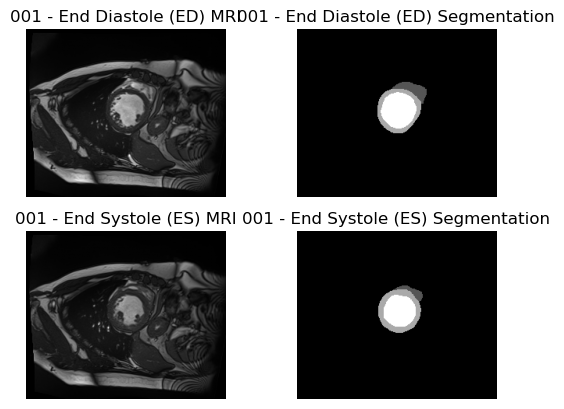

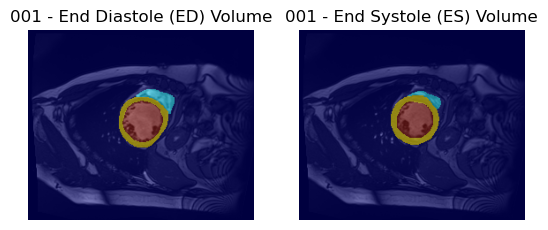

In [5]:
# Plot the data
sample_id = '001'
ed_data = ed_data_dict[sample_id]
ed_seg_data = ed_seg_data_dict[sample_id]
es_data = es_data_dict[sample_id]
es_seg_data = es_seg_data_dict[sample_id]

slice_index = ed_data.shape[2] // 2  #slice in the middle of the volume
plt.subplot(2,2,1)
plt.imshow(ed_data[:, :, slice_index], cmap='gray')
plt.title(f'{sample_id} - End Diastole (ED) MRI')
plt.axis('off')

plt.subplot(2,2,2)
plt.imshow(ed_seg_data[:, :, slice_index], cmap='gray')
plt.title(f'{sample_id} - End Diastole (ED) Segmentation')
plt.axis('off')

plt.subplot(2,2,3)
plt.imshow(es_data[:, :, slice_index], cmap='gray')
plt.title(f'{sample_id} - End Systole (ES) MRI')
plt.axis('off')

plt.subplot(2,2,4)
plt.imshow(es_seg_data[:, :, slice_index], cmap='gray')
plt.title(f'{sample_id} - End Systole (ES) Segmentation')
plt.axis('off')
plt.show()

# ED volume slice
plt.subplot(1, 2, 1)
plt.imshow(ed_data[:, :, slice_index], cmap='gray')
plt.imshow(ed_seg_data[:, :, slice_index], cmap='jet', alpha=0.5)
plt.title(f'{sample_id} - End Diastole (ED) Volume')
plt.axis('off')

# ES volume slice
plt.subplot(1, 2, 2)
plt.imshow(es_data[:, :, slice_index], cmap='gray')
plt.imshow(es_seg_data[:, :, slice_index], cmap='jet', alpha=0.5)
plt.title(f'{sample_id} - End Systole (ES) Volume')
plt.axis('off')

plt.show()

## Plot of the test data

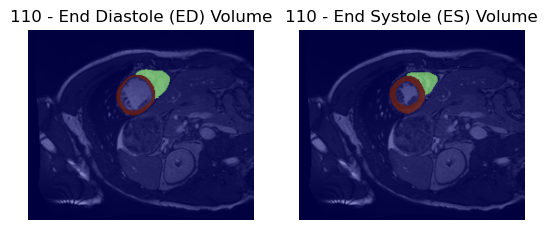

In [7]:
sample_id = '110'
ed_data = ed_data_dict_test[sample_id]
ed_seg_data = ed_seg_data_dict_test[sample_id]
es_data = es_data_dict_test[sample_id]
es_seg_data = es_seg_data_dict_test[sample_id]

slice_index = ed_data.shape[2] // 2  #Slice in the middle of the volume

# Plot ED volume slice
plt.subplot(1, 2, 1)
plt.imshow(ed_data[:, :, slice_index], cmap='gray')
plt.imshow(ed_seg_data[:, :, slice_index], cmap='jet', alpha=0.5)
plt.title(f'{sample_id} - End Diastole (ED) Volume')
plt.axis('off')

# Plot ES volume slice
plt.subplot(1, 2, 2)
plt.imshow(es_data[:, :, slice_index], cmap='gray')
plt.imshow(es_seg_data[:, :, slice_index], cmap='jet', alpha=0.5)
plt.title(f'{sample_id} - End Systole (ES) Volume')
plt.axis('off')

plt.show()

In [8]:
df = pd.read_csv(os.path.join(path_initial, 'metaDataTrain.csv'))

In [9]:
df

,Id,Category,Height,Weight
0,1,2,184.0,95.0
1,2,2,160.0,70.0
2,3,2,165.0,77.0
3,4,2,159.0,46.0
4,5,2,165.0,77.0
...,...,...,...,...
95,96,4,186.0,76.0
96,97,4,187.0,82.0
97,98,4,167.0,50.0
98,99,4,180.0,80.0


In [10]:
category0 = df[df["Category"]==0]
category1 = df[df["Category"]==1]
category2 = df[df["Category"]==2]
category3 = df[df["Category"]==3]
category4 = df[df["Category"]==4]

print("length of category0: ", len(category0))
print("length of category1: ", len(category1))
print("length of category2: ", len(category2))
print("length of category3: ", len(category3))
print("length of category4: ", len(category4))


length of category0:  20
length of category1:  20
length of category2:  20
length of category3:  20
length of category4:  20


There are 20 patients per category.

Class 0: 170
Class 1: 173
Class 2: 195
Class 3: 189
Class 4: 224


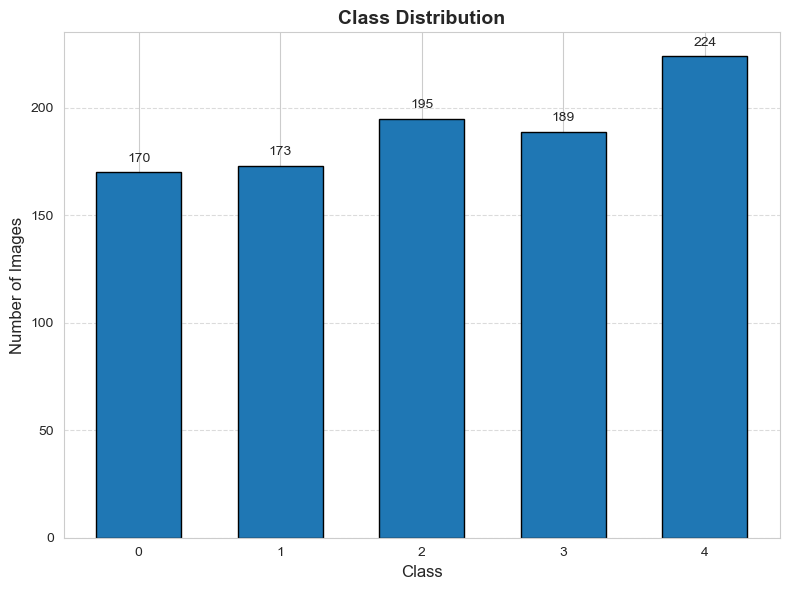

In [11]:
class_0 = 0
class_1 = 0
class_2 = 0
class_3 = 0
class_4 = 0
for key in ed_data_dict.keys():
    key_int = int(key)
    number_of_slices = ed_data_dict[key].shape[2]
    if df[df["Id"]==key_int]["Category"].values[0] == 0:
        class_0 += number_of_slices
    elif df[df["Id"]==key_int]["Category"].values[0] == 1:
        class_1 += number_of_slices
    elif df[df["Id"]==key_int]["Category"].values[0] == 2:
        class_2 += number_of_slices
    elif df[df["Id"]==key_int]["Category"].values[0] == 3:
        class_3 += number_of_slices
    elif df[df["Id"]==key_int]["Category"].values[0] == 4:
        class_4 += number_of_slices
print(f'Class 0: {class_0}')
print(f'Class 1: {class_1}')
print(f'Class 2: {class_2}')
print(f'Class 3: {class_3}')
print(f'Class 4: {class_4}')

# Data for the histogram
classes = [0, 1, 2, 3, 4]
class_counts = [class_0, class_1, class_2, class_3, class_4]


sns.set_style("whitegrid")


plt.figure(figsize=(8, 6))
bars = plt.bar(classes, class_counts, edgecolor='black', width=0.6)


plt.xlabel('Class', fontsize=12)
plt.ylabel('Number of Images', fontsize=12)
plt.title('Class Distribution', fontsize=14, fontweight='bold')


plt.grid(axis='y', linestyle='--', alpha=0.7)


for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 5, f'{int(height)}', ha='center', fontsize=10)


plt.xticks(classes, fontsize=10)
plt.yticks(fontsize=10)


plt.tight_layout()
plt.show()





# Preprocessing

In [12]:
from skimage.morphology import convex_hull_image
from scipy.ndimage import center_of_mass
from scipy.ndimage import binary_fill_holes

In [13]:
def get_bounding_box(mask):

    coords =np.argwhere(mask)
    if coords.size == 0:
        return None
    y_min, x_min = coords.min(axis=0)
    y_max, x_max = coords.max(axis=0)
    return x_min, y_min, x_max, y_max

In [14]:
def fill_holes_with_bb(mask):
    # Fill holes in the mask
    mask_copy = mask.copy()

    mask_copy[mask_copy == 1] = 0
    mask_copy[mask_copy == 2] = 1
    mask_copy[mask_copy == 3] = 0 # Remove the left ventricle segmentation for the case where we apply the function the the training data
    mask_copy = mask_copy.astype(np.uint8)  # Convert to uint8 for OpenCV
    mask_copy = binary_closing(mask_copy, structure=np.ones((8, 8))).astype(np.uint8)

    bb = get_bounding_box(mask_copy)
    if bb is None:

        filled_mask = binary_fill_holes(mask_copy).astype(np.uint8)
    else:
        x_min, y_min, x_max, y_max =bb
        # Crop the mask to the bounding box

        cropped_mask = mask_copy[y_min:y_max, x_min:x_max]
        filled_mask_cropped = binary_fill_holes(cropped_mask).astype(np.uint8)
        if np.array_equal(cropped_mask, filled_mask_cropped):
            # If the filled mask is the same as the original, the myocardium is not closed

            # draw a circle
            my_region = (cropped_mask ==1).astype(np.uint8)
            # Find the center of the myocardium
            center = center_of_mass(my_region)
            distances = []
            for i in range(cropped_mask.shape[0]):
                for j in range(cropped_mask.shape[1]):
                    if cropped_mask[i, j] == 1:
                        distances.append(np.sqrt((i - center[0]) ** 2 + (j - center[1]) ** 2))
            dist = np.mean(distances)
            circle_mask = np.zeros_like(cropped_mask)
            for i in range(cropped_mask.shape[0]):
                for j in range(cropped_mask.shape[1]):
                    distance = np.sqrt((i - center[0]) ** 2 + (j - center[1]) ** 2)
                    if distance < dist:
                        circle_mask[i, j] = 1

            filled_mask_cropped = circle_mask

        filled_mask = binary_fill_holes(mask_copy).astype(np.uint8)
        filled_mask[y_min:y_max, x_min:x_max] = filled_mask_cropped

        filled_mask = filled_mask.astype(np.uint8)

    filled_mask = filled_mask*3
    filled_mask[mask == 2] = 2
    filled_mask[mask == 1] = 1

    return filled_mask

def process_all_slices_with_bb(mask):
    # Process all slices in the mask
    mask_copy = mask.copy()
    for i in range(mask_copy.shape[2]):

        filled_mask = fill_holes_with_bb(mask_copy[:, :, i])
        mask_copy[:, :, i] = filled_mask
    return mask_copy

def process_all_masks_with_bb(ed_seg_data, es_seg_data):
    # Process all masks
    ed_seg = {}
    es_seg = {}
    for i in ed_seg_data.keys():
        ed_seg[i] = process_all_slices_with_bb(ed_seg_data[i])
        es_seg[i] = process_all_slices_with_bb(es_seg_data[i])
    return ed_seg, es_seg

## Preprocessing with contour drawing

In [ ]:
def compute_contour_slice_opencv(mask,slice_index):
    # Compute the contour of the mask using OpenCV
    mask_copy = mask.copy()
    mask_copy[mask_copy == 1] = 0
    mask_copy[mask_copy == 2] = 1

    # Finding contours
    closed_mask = binary_closing(mask_copy[:, :, slice_index], structure=np.ones((5, 5)))
    contours, _ = cv2.findContours(closed_mask.astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    # Drawing contours on the mask
    for contour in contours:
        filled = np.zeros_like(mask_copy[:, :, slice_index], dtype=np.uint8)
        cv2.drawContours(filled, [contour], -1, (1), thickness=-1)
    filled = np.zeros_like(mask_copy[:, :, slice_index], dtype=np.uint8)
    cv2.drawContours(filled, contours, -1, (1), thickness=-1)
        #plt.imshow(filled, cmap='gray')
        #plt.title('Filled Contours')
        #plt.axis('off')
        #plt.show()
    left_ventricle_mask = filled - mask_copy[:, :, slice_index]
    left_ventricle_mask = np.clip(left_ventricle_mask, 0, 1)
    left_ventricule_mask = left_ventricle_mask*3
    left_ventricule_mask [mask[:,:,slice_index]==2] = 2
    left_ventricule_mask [mask[:,:,slice_index]==1] = 1

    return left_ventricule_mask

def compute_contour_opencv(mask):

    mask_copy = mask.copy()
    for i in range(mask_copy.shape[2]):
        left_ventricule_mask = compute_contour_slice_opencv(mask_copy, i)
        mask_copy[:, :, i] = left_ventricule_mask
    return mask_copy

def compute_contour_segmentation_opencv(ed_seg_data, es_seg_data):
    # Computing the contour of the segmentations using OpenCV
    ed_contour = {}
    es_contour = {}
    for i in ed_seg_data.keys():
        ed_contour[i] = compute_contour_opencv(ed_seg_data[i])
        es_contour[i] = compute_contour_opencv(es_seg_data[i])
    return ed_contour, es_contour


# Training Model

In [16]:

#np.random.seed(seed=666)

from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from tqdm import tqdm
from torch import optim


import pandas as pd

## Preparing train data

In [17]:
def load_segmentation(filepath):
    """
    Load the segmentation data from a NIfTI file.
    """
    img = nib.load(filepath)
    data = img.get_fdata()
    header = img.header
    spacing = header.get_zooms()
    return data,spacing

In [18]:
def compute_volume(segmentation_data, label, spacing):

    voxel_volume = np.prod(spacing)
    volume_tot = np.sum(segmentation_data == label) * voxel_volume

    return volume_tot



In [ ]:
## For each sample, we will determine the volume of the left ventricle (LV) and right ventricle (RV) in both ED and ES phases.
def compute_volumes_for_all(path):
    """
    Compute the volumes of the left ventricle (LV) and right ventricle (RV) in both ED and ES phases for all samples.
    """
    volumes = []

    for folder in os.listdir(path):
        folder_path = os.path.join(path, folder)

        # Checks if the folder is a directory
        if os.path.isdir(folder_path):
            # Load the ED and ES images
            ed_file = os.path.join(folder_path, f'{folder}_ED_seg.nii')
            es_file = os.path.join(folder_path, f'{folder}_ES_seg.nii')

            # Loads the images using nibabel if they exist
            if os.path.exists(ed_file) and os.path.exists(es_file):
                ed_data, ed_spacing = load_segmentation(ed_file)
                es_data, es_spacing = load_segmentation(es_file)

                # Computes volumes for LV (label 1) and RV (label 2)
                lv_volume_ed = compute_volume(ed_data, 3, ed_spacing)
                rv_volume_ed = compute_volume(ed_data, 1, ed_spacing)
                my_volume_ed = compute_volume(ed_data, 2, ed_spacing)

                lv_volume_es = compute_volume(es_data, 3, es_spacing)
                rv_volume_es = compute_volume(es_data, 1, es_spacing)
                my_volume_es = compute_volume(es_data, 2, es_spacing)

                volumes.append({
                    'Sample': folder,
                    'LV_ED': lv_volume_ed,
                    'RV_ED': rv_volume_ed,
                    'LV_ES': lv_volume_es,
                    'RV_ES': rv_volume_es,
                    'MY_ED': my_volume_ed,
                    'MY_ES': my_volume_es
                })

    return pd.DataFrame(volumes)

In [ ]:
def compute_myocardial_mass(path):
    """
    Compute the myocardial mass for all samples.
    """
    masses = []
    for folder in os.listdir(path):
        folder_path = os.path.join(path,folder)
        # Check if the folder is a directory
        if os.path.isdir(folder_path):
            # Loads the ED images
            ed_file = os.path.join(folder_path, f'{folder}_ED_seg.nii')

            # Loads the images using nibabel if they exist
            if os.path.exists(ed_file):
                ed_data, ed_spacing = load_segmentation(ed_file)

                # Compute myocardial mass (label 2)
                my_mass = compute_volume(ed_data, 2, ed_spacing)* 1.05  # Assuming a density of 1.05 g/cm^3 for myocardium

                masses.append({
                    'Sample': folder,
                    'MY_Mass': my_mass
                })
    return pd.DataFrame(masses)

In [ ]:
 ## For each sample, we will determine the volume of the left ventricle (LV) and right ventricle (RV) in both ED and ES phases.
def compute_volumes_for_all_test(path):
    """
    Compute the volumes of the left ventricle (LV) and right ventricle (RV) in both ED and ES phases for all samples.
    """
    volumes = []
    for folder in os.listdir(path):
        folder_path = os.path.join(path, folder)

        # Checks if the folder is a directory
        if os.path.isdir(folder_path):
            # Loads the ED and ES images
            ed_file = os.path.join(folder_path, f'{folder}_ED_seg.nii')
            es_file = os.path.join(folder_path, f'{folder}_ES_seg.nii')

            # Loads the images using nibabel if they exist
            if os.path.exists(ed_file) and os.path.exists(es_file):
                ed_data, ed_spacing = load_segmentation(ed_file)
                es_data, es_spacing = load_segmentation(es_file)

                ## Adds left ventricule mask
                ed_data = process_all_slices_with_bb(ed_data)
                es_data = process_all_slices_with_bb(es_data)

                #ed_data = compute_contour_opencv(ed_data)
                #es_data = compute_contour_opencv(es_data)

                # Computes volumes for LV (label 1) and RV (label 2)
                lv_volume_ed = compute_volume(ed_data, 3, ed_spacing)
                rv_volume_ed = compute_volume(ed_data, 1, ed_spacing)
                my_volume_ed = compute_volume(ed_data, 2, ed_spacing)

                lv_volume_es = compute_volume(es_data, 3, es_spacing)
                rv_volume_es = compute_volume(es_data, 1, es_spacing)
                my_volume_es = compute_volume(es_data, 2, es_spacing)

                volumes.append({
                    'Sample': folder,
                    'LV_ED': lv_volume_ed,
                    'RV_ED': rv_volume_ed,
                    'LV_ES': lv_volume_es,
                    'RV_ES': rv_volume_es,
                    'MY_ED': my_volume_ed,
                    'MY_ES': my_volume_es
                })

    return pd.DataFrame(volumes)

In [22]:
 ## For each sample, we will determine the volume of the left ventricle (LV) and right ventricle (RV) in both ED and ES phases.
def compute_volumes_for_all_test_contour(path):
    """
    Compute the volumes of the left ventricle (LV) and right ventricle (RV) in both ED and ES phases for all samples.
    """
    volumes = []
    for folder in os.listdir(path):
        folder_path = os.path.join(path, folder)

        # Checks if the folder is a directory
        if os.path.isdir(folder_path):
            # Loads the ED and ES images
            ed_file = os.path.join(folder_path, f'{folder}_ED_seg.nii')
            es_file = os.path.join(folder_path, f'{folder}_ES_seg.nii')

            # Loads the images using nibabel if they exist
            if os.path.exists(ed_file) and os.path.exists(es_file):
                ed_data, ed_spacing = load_segmentation(ed_file)
                es_data, es_spacing = load_segmentation(es_file)

                ## Adds left ventricule mask
                ed_data = compute_contour_opencv(ed_data)
                es_data = compute_contour_opencv(es_data)

                # Computes volumes for LV (label 1) and RV (label 2)
                lv_volume_ed = compute_volume(ed_data, 3, ed_spacing)
                rv_volume_ed = compute_volume(ed_data, 1, ed_spacing)
                my_volume_ed = compute_volume(ed_data, 2, ed_spacing)

                lv_volume_es = compute_volume(es_data, 3, es_spacing)
                rv_volume_es = compute_volume(es_data, 1, es_spacing)
                my_volume_es = compute_volume(es_data, 2, es_spacing)

                volumes.append({
                    'Sample': folder,
                    'LV_ED': lv_volume_ed,
                    'RV_ED': rv_volume_ed,
                    'LV_ES': lv_volume_es,
                    'RV_ES': rv_volume_es,
                    'MY_ED': my_volume_ed,
                    'MY_ES': my_volume_es
                })

    return pd.DataFrame(volumes)

In [23]:
def compute_myocardial_mass_test(path):
    """
    Compute the myocardial mass for all samples.
    """
    masses = []
    for folder in os.listdir(path):
        #print(f"folder is:{folder}")

        folder_path = os.path.join(path,folder)
        # Checks if the folder is a directory
        if os.path.isdir(folder_path):
            # Loads the ED images
            ed_file = os.path.join(folder_path, f'{folder}_ED_seg.nii')

            # Loads the images using nibabel if they exist
            if os.path.exists(ed_file):
                ed_data, ed_spacing = load_segmentation(ed_file)

                ed_data = process_all_slices_with_bb(ed_data)
                #ed_data = compute_contour_opencv(ed_data)

                # Computes myocardial mass (label 2)
                my_mass = compute_volume(ed_data, 2, ed_spacing)* 1.05  # Assuming a density of 1.05 g/cm^3 for myocardium

                masses.append({
                    'Sample': folder,
                    'MY_Mass': my_mass
                })
    return pd.DataFrame(masses)

In [24]:
def compute_myocardial_mass_test_contour(path):
    """
    Compute the myocardial mass for all samples.
    """
    masses = []
    for folder in os.listdir(path):
        #print(f"folder is:{folder}")

        folder_path = os.path.join(path,folder)
        # Checks if the folder is a directory
        if os.path.isdir(folder_path):
            # Loads the ED images
            ed_file = os.path.join(folder_path, f'{folder}_ED_seg.nii')

            # Loads the images using nibabel if they exist
            if os.path.exists(ed_file):
                ed_data, ed_spacing = load_segmentation(ed_file)


                ed_data = compute_contour_opencv(ed_data)

                # Computes myocardial mass (label 2)
                my_mass = compute_volume(ed_data, 2, ed_spacing)* 1.05  # Assuming a density of 1.05 g/cm^3 for myocardium

                masses.append({
                    'Sample': folder,
                    'MY_Mass': my_mass
                })
    return pd.DataFrame(masses)

# Create train dataframe

In [25]:
df_train = pd.read_csv(os.path.join(path_initial, 'metaDataTrain.csv'))

In [26]:
def create_train_dataframe(path,df):

    volume_df_train = compute_volumes_for_all(path)
    mass_df_train = compute_myocardial_mass(path)
    # Merge the two dataframes on the 'Sample' column
    merged_df_train = pd.merge(volume_df_train, mass_df_train, on='Sample')

    merged_df_train['Sample']= merged_df_train['Sample'].astype(int)

    df_final = pd.merge(df, merged_df_train, left_on='Id',right_on='Sample', how='left')
    df_final = df_final.drop(columns=['Sample'])

    df_final["LV_EF"] = ((df_final["LV_ED"] - df_final["LV_ES"]) / df_final["LV_ED"].replace(0, np.nan)) * 100
    df_final["RV_EF"] = ((df_final["RV_ED"] - df_final["RV_ES"]) / df_final["RV_ED"].replace(0, np.nan)) * 100
    df_final["ratio_V_ED"] = df_final["RV_ED"] / df_final["LV_ED"].replace(0, np.nan)
    df_final["ratio_V_ES"] = df_final["RV_ES"] / df_final["LV_ES"].replace(0, np.nan)
    df_final["ratio_M_ED"] = df_final["MY_ED"] / df_final["LV_ED"].replace(0, np.nan)
    df_final["ratio_M_ES"] = df_final["MY_ES"] / df_final["LV_ES"].replace(0, np.nan)

    # Mosteller formula for BSA
    df_final["BSA"] = np.sqrt((df_final["Weight"] * df_final["Height"]) / 3600)
    df_final["BMI"] = df_final["Weight"] / ((df_final["Height"]) ** 2)
    #df_final["LVSV"] = df_final["LV_ED"] - df_final["LV_ES"]
    #df_final["RVSV"] = df_final["RV_ED"] - df_final["RV_ES"]

    df_final["LV_ED_norm"] = df_final["LV_ED"] / df_final["BSA"]
    df_final["RV_ED_norm"] = df_final["RV_ED"] / df_final["BSA"]
    df_final["LV_ES_norm"] = df_final["LV_ES"] / df_final["BSA"]
    df_final["RV_ES_norm"] = df_final["RV_ES"] / df_final["BSA"]
    df_final["MY_ED_norm"] = df_final["MY_ED"] / df_final["BSA"]
    df_final["MY_ES_norm"] = df_final["MY_ES"] / df_final["BSA"]
    df_final["My_Mass_norm"] = df_final["MY_Mass"] / df_final["BSA"]
    #df_final["LVSV_norm"] = df_final["LVSV"] / df_final["BSA"]
    #df_final["RVSV_norm"] = df_final["RVSV"] / df_final["BSA"]

    df_final = df_final.drop(columns=['Id'])

    return df_final


In [27]:
df_final_train = create_train_dataframe(path_train,df_train)

In [28]:
df_final_train

,Category,Height,Weight,LV_ED,RV_ED,LV_ES,RV_ES,MY_ED,MY_ES,MY_Mass,...,ratio_M_ES,BSA,BMI,LV_ED_norm,RV_ED_norm,LV_ES_norm,RV_ES_norm,MY_ED_norm,MY_ES_norm,My_Mass_norm
0,2,184.0,95.0,295507.812500,139721.679688,225610.351562,59545.898438,164257.812500,195068.359375,172470.703125,...,0.864625,2.203533,0.002806,134106.399682,63408.040762,102385.760035,27022.927034,74542.949195,88525.291925,78270.096655
1,2,160.0,70.0,265744.400024,94432.067871,188303.375244,28823.089600,160433.578491,192565.155029,168455.257416,...,1.022633,1.763834,0.002734,150662.913166,53537.950152,106757.978985,16341.155807,90957.289421,109174.181011,95505.153892
2,2,165.0,77.0,276708.984375,192333.984375,241088.867188,174584.960938,191845.703125,201074.218750,201437.988281,...,0.834025,1.878608,0.002828,147294.718929,102381.136027,128333.805314,92933.168790,102121.219459,107033.642589,107227.280432
3,2,159.0,46.0,260847.091675,106264.114380,226472.473145,84543.991089,168452.453613,174957.275391,176875.076294,...,0.772532,1.425365,0.001820,183003.658210,74552.188959,158887.303681,59313.905129,118181.939648,122745.556492,124091.036630
4,2,165.0,77.0,290797.119141,170463.867188,224094.726562,74553.222656,201392.578125,232261.962891,211462.207031,...,1.036445,1.878608,0.002828,154793.961700,90739.472958,119287.669091,39685.361143,107203.108191,123635.163561,112563.263601
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,4,186.0,76.0,152260.992193,284093.103704,74905.895834,217681.544952,116967.021618,115055.795774,122815.372699,...,1.536005,1.981582,0.002197,76838.103583,143366.827020,37801.060535,109852.411036,59027.095472,58062.600448,61978.450246
96,4,187.0,82.0,124381.027813,208836.737221,49664.275764,129096.269611,93511.617722,110345.471619,98187.198608,...,2.221828,2.063842,0.002345,60266.734768,101188.328102,24063.989401,62551.425865,45309.481374,53466.042112,47574.955443
97,4,167.0,50.0,93843.750000,164656.250000,41187.500000,161500.000000,93625.000000,102171.875000,98306.250000,...,2.480653,1.522972,0.001793,61618.818467,108115.069765,27044.156757,106042.641971,61475.184858,67087.155171,64548.944101
98,4,180.0,80.0,140401.102558,200365.734255,74058.950872,136638.365765,92585.646441,92234.882841,97214.928763,...,1.245425,2.000000,0.002469,70200.551279,100182.867127,37029.475436,68319.182882,46292.823220,46117.441421,48607.464381


## Checking Feature Importance depending on the class

In [29]:
import seaborn as sns

/var/folders/55/d0mg54z905g7mdwb_1x62zpw0000gn/T/ipykernel_8329/2761738217.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='Category_Label', y='LV_ED', data=df_train_copy, palette='Set2',size=5)


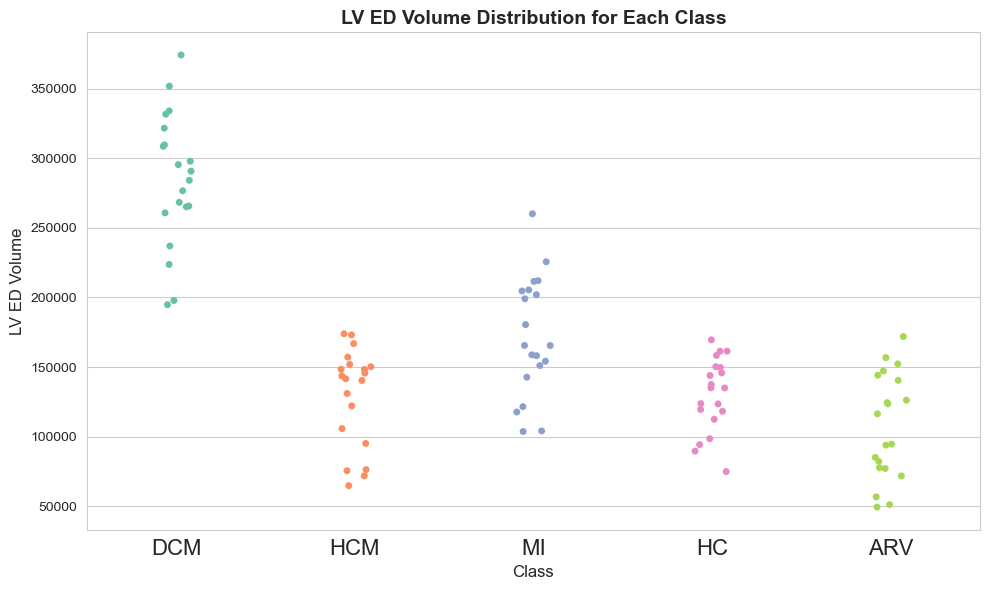

/var/folders/55/d0mg54z905g7mdwb_1x62zpw0000gn/T/ipykernel_8329/2761738217.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='Category_Label', y='ratio_V_ED', data=df_train_copy, palette='Set2',size=5)


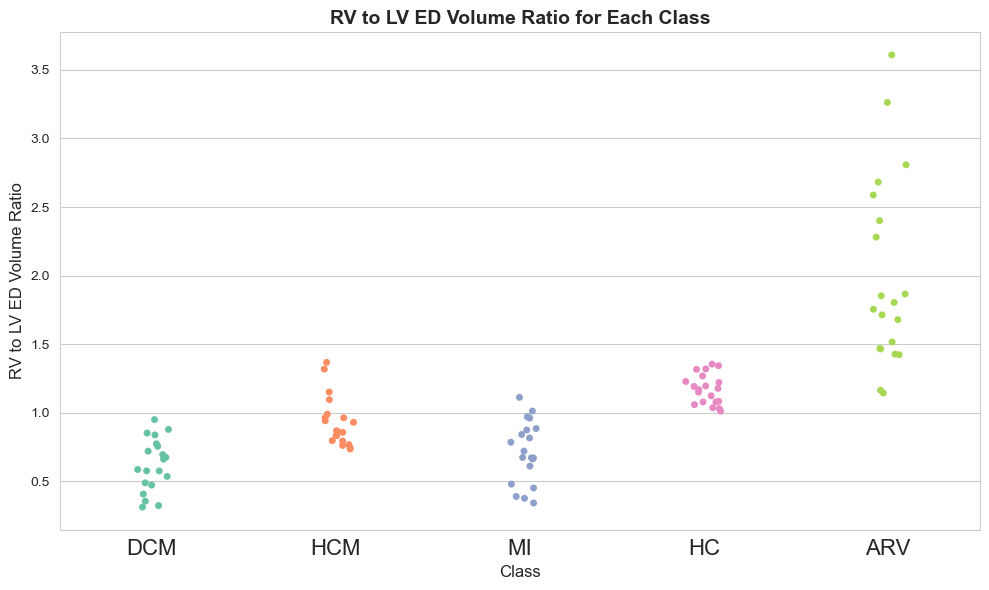

/var/folders/55/d0mg54z905g7mdwb_1x62zpw0000gn/T/ipykernel_8329/2761738217.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='Category_Label', y='LV_EF', data=df_train_copy, palette='Set2',size=5)


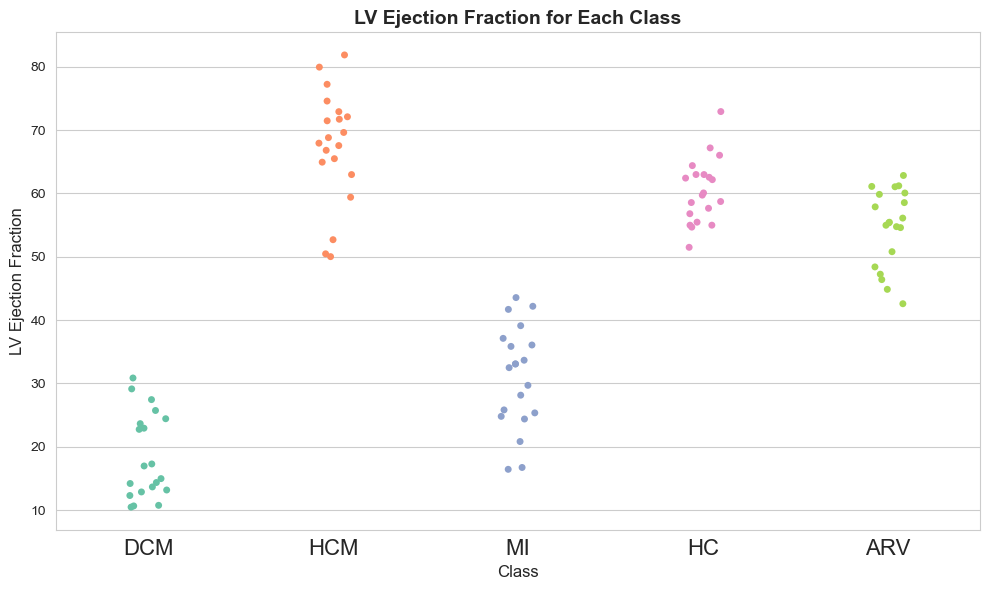

/var/folders/55/d0mg54z905g7mdwb_1x62zpw0000gn/T/ipykernel_8329/2761738217.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='Category_Label', y='ratio_M_ES', data=df_train_copy, palette='Set2',size=5)


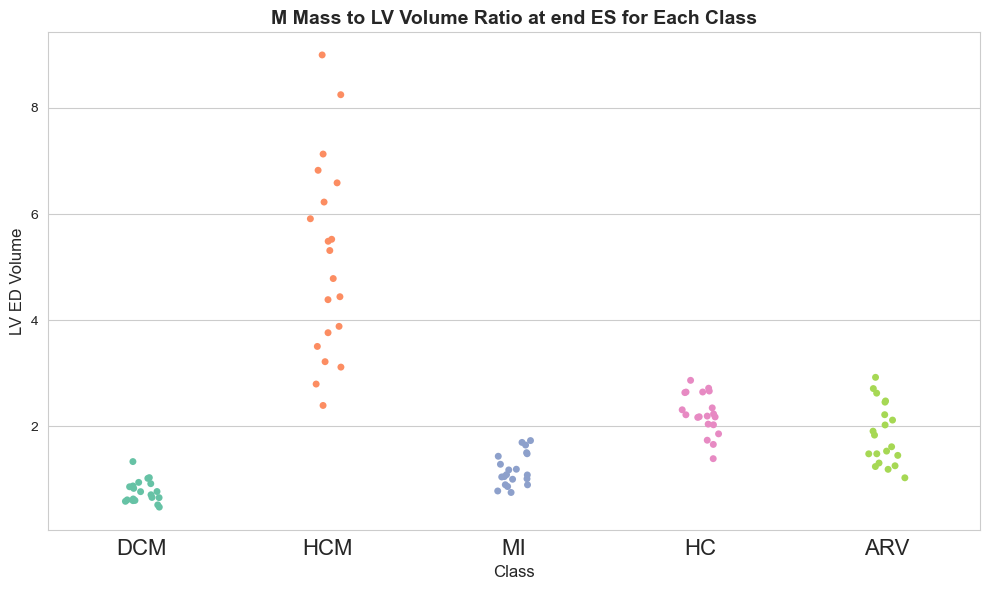

/var/folders/55/d0mg54z905g7mdwb_1x62zpw0000gn/T/ipykernel_8329/2761738217.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='Category_Label', y='RV_EF', data=df_train_copy, palette='Set2',size=5)


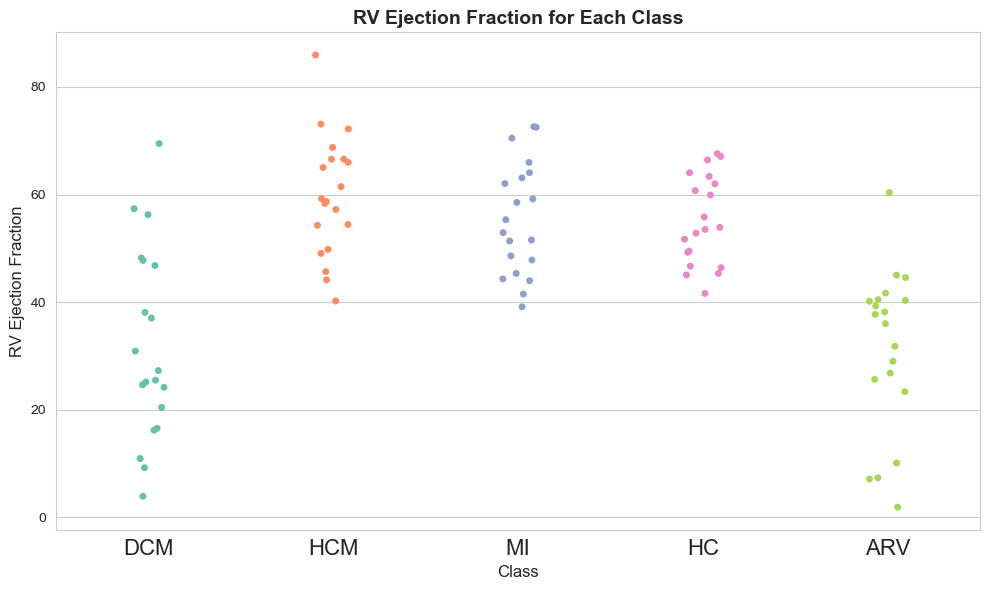

/var/folders/55/d0mg54z905g7mdwb_1x62zpw0000gn/T/ipykernel_8329/2761738217.py:79: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='Category_Label', y='RV_ED', data=df_train_copy, palette='Set2',size=5)


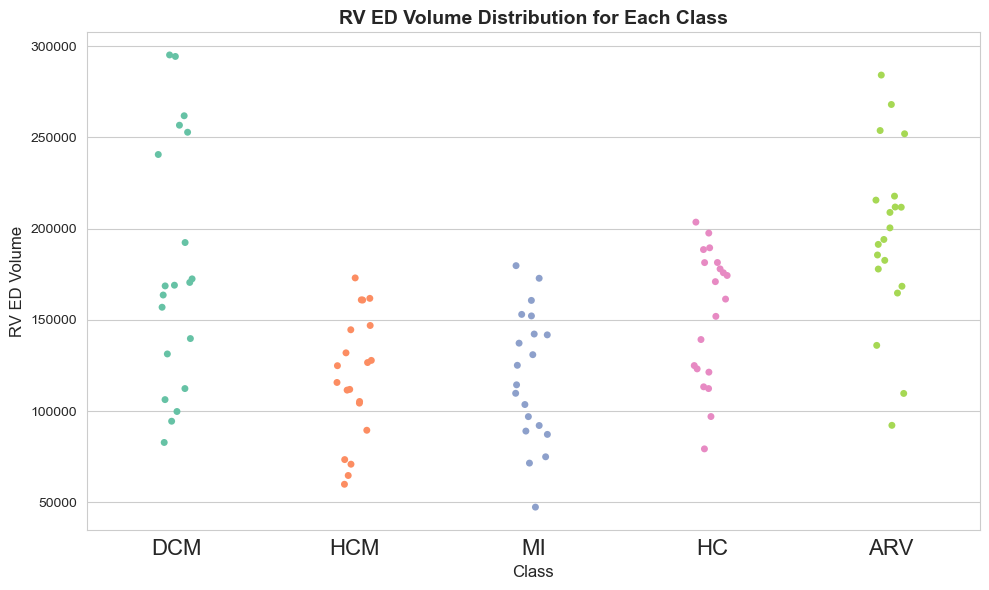

In [ ]:
classes = ["HC","MI","DCM","HCM","ARV"]
df_train_copy = df_final_train.copy()
df_train_copy['Category_Label'] = [classes[i] for i in df_train_copy['Category'].values]

# Left Ventricle ED Volume Distribution
plt.figure(figsize=(10, 6))
sns.stripplot(x='Category_Label', y='LV_ED', data=df_train_copy, palette='Set2',size=5)


plt.xlabel('Class', fontsize=12)
plt.ylabel('LV ED Volume', fontsize=12)
plt.title('LV ED Volume Distribution for Each Class', fontsize=14, fontweight='bold')

plt.xticks(fontsize=16)


plt.tight_layout()
plt.show()

# Right Ventricule to Left Ventricle Volume ratio
plt.figure(figsize=(10, 6))
sns.stripplot(x='Category_Label', y='ratio_V_ED', data=df_train_copy, palette='Set2',size=5)


plt.xlabel('Class', fontsize=12)
plt.ylabel('RV to LV ED Volume Ratio', fontsize=12)
plt.title('RV to LV ED Volume Ratio for Each Class', fontsize=14, fontweight='bold')

plt.xticks(fontsize=16)


plt.tight_layout()
plt.show()

# Left Ventricle Ejection Fraction
plt.figure(figsize=(10, 6))
sns.stripplot(x='Category_Label', y='LV_EF', data=df_train_copy, palette='Set2',size=5)


plt.xlabel('Class', fontsize=12)
plt.ylabel('LV Ejection Fraction', fontsize=12)
plt.title('LV Ejection Fraction for Each Class', fontsize=14, fontweight='bold')

plt.xticks(fontsize=16)


plt.tight_layout()
plt.show()

# Ratio of Myocardial Mass to Left Ventricle Volume at ES
plt.figure(figsize=(10, 6))
sns.stripplot(x='Category_Label', y='ratio_M_ES', data=df_train_copy, palette='Set2',size=5)


plt.xlabel('Class', fontsize=12)
plt.ylabel('LV ED Volume', fontsize=12)
plt.title('M Mass to LV Volume Ratio at end ES for Each Class', fontsize=14, fontweight='bold')
plt.xticks(fontsize=16)


plt.tight_layout()
plt.show()

# Right Ventricle Ejection Fraction
plt.figure(figsize=(10, 6))
sns.stripplot(x='Category_Label', y='RV_EF', data=df_train_copy, palette='Set2',size=5)


plt.xlabel('Class', fontsize=12)
plt.ylabel('RV Ejection Fraction', fontsize=12)
plt.title('RV Ejection Fraction for Each Class', fontsize=14, fontweight='bold')
plt.xticks(fontsize=16)

plt.tight_layout()
plt.show()

# Right Ventricle ED Volume Distribution
plt.figure(figsize=(10, 6))
sns.stripplot(x='Category_Label', y='RV_ED', data=df_train_copy, palette='Set2',size=5)


plt.xlabel('Class', fontsize=12)
plt.ylabel('RV ED Volume', fontsize=12)
plt.title('RV ED Volume Distribution for Each Class', fontsize=14, fontweight='bold')
plt.xticks(fontsize=16)
t
plt.tight_layout()
plt.show()


## Checking Segmentation Accuracy based on Features' Computation

In [ ]:
def create_test_dataframe(path,df):

    volume_df_test = compute_volumes_for_all_test(path)
    mass_df_test = compute_myocardial_mass_test(path)
    # Merges the two dataframes on the 'Sample' column
    merged_df_test = pd.merge(volume_df_test, mass_df_test, on='Sample')

    merged_df_test['Sample']= merged_df_test['Sample'].astype(int)

    df_final = pd.merge(df, merged_df_test, left_on='Id',right_on='Sample', how='left')
    df_final = df_final.drop(columns=['Sample'])

    df_final["LV_EF"] = ((df_final["LV_ED"] - df_final["LV_ES"]) / df_final["LV_ED"].replace(0, np.nan)) * 100
    df_final["RV_EF"] = ((df_final["RV_ED"] - df_final["RV_ES"]) / df_final["RV_ED"].replace(0, np.nan)) * 100
    df_final["ratio_V_ED"] = df_final["RV_ED"] / df_final["LV_ED"].replace(0, np.nan)
    df_final["ratio_V_ES"] = df_final["RV_ES"] / df_final["LV_ES"].replace(0, np.nan)
    df_final["ratio_M_ED"] = df_final["MY_ED"] / df_final["LV_ED"].replace(0, np.nan)
    df_final["ratio_M_ES"] = df_final["MY_ES"] / df_final["LV_ES"].replace(0, np.nan)


    # Mosteller formula for BSA
    df_final["BSA"] = np.sqrt((df_final["Weight"] * df_final["Height"]) / 3600)
    df_final["BMI"] = df_final["Weight"] / ((df_final["Height"]) ** 2)
    #df_final["LVSV"] = df_final["LV_ED"] - df_final["LV_ES"]
    #df_final["RVSV"] = df_final["RV_ED"] - df_final["RV_ES"]

    df_final["LV_ED_norm"] = df_final["LV_ED"] / df_final["BSA"]
    df_final["RV_ED_norm"] = df_final["RV_ED"] / df_final["BSA"]
    df_final["LV_ES_norm"] = df_final["LV_ES"] / df_final["BSA"]
    df_final["RV_ES_norm"] = df_final["RV_ES"] / df_final["BSA"]
    df_final["MY_ED_norm"] = df_final["MY_ED"] / df_final["BSA"]
    df_final["MY_ES_norm"] = df_final["MY_ES"] / df_final["BSA"]
    df_final["My_Mass_norm"] = df_final["MY_Mass"] / df_final["BSA"]
    #df_final["LVSV_norm"] = df_final["LVSV"] / df_final["BSA"]
    #df_final["RVSV_norm"] = df_final["RVSV"] / df_final["BSA"]



    return df_final


In [32]:
df_train_test = create_test_dataframe(path_train,df_train)

In [33]:
df_train_test

,Id,Category,Height,Weight,LV_ED,RV_ED,LV_ES,RV_ES,MY_ED,MY_ES,...,ratio_M_ES,BSA,BMI,LV_ED_norm,RV_ED_norm,LV_ES_norm,RV_ES_norm,MY_ED_norm,MY_ES_norm,My_Mass_norm
0,1,2,184.0,95.0,295629.882812,139721.679688,225610.351562,59545.898438,164257.812500,195068.359375,...,0.864625,2.203533,0.002806,134161.797236,63408.040762,102385.760035,27022.927034,74542.949195,88525.291925,78270.096655
1,2,2,160.0,70.0,265763.092041,94432.067871,188247.299194,28823.089600,160433.578491,192565.155029,...,1.022937,1.763834,0.002734,150673.510543,53537.950152,106726.186853,16341.155807,90957.289421,109174.181011,95505.153892
2,3,2,165.0,77.0,276879.882812,192333.984375,240917.968750,174584.960938,191845.703125,201074.218750,...,0.834617,1.878608,0.002828,147385.689728,102381.136027,128242.834515,92933.168790,102121.219459,107033.642589,107227.280432
3,4,2,159.0,46.0,260865.783691,106264.114380,226248.168945,84543.991089,168452.453613,174957.275391,...,0.773298,1.425365,0.001820,183016.772051,74552.188959,158729.937583,59313.905129,118181.939648,122745.556492,124091.036630
4,5,2,165.0,77.0,290797.119141,170463.867188,224114.501953,74553.222656,201392.578125,232261.962891,...,1.036354,1.878608,0.002828,154793.961700,90739.472958,119298.195712,39685.361143,107203.108191,123635.163561,112563.263601
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,4,186.0,76.0,152275.149422,284093.103704,74877.581377,217681.544952,116967.021618,115055.795774,...,1.536585,1.981582,0.002197,76845.247991,143366.827020,37786.771720,109852.411036,59027.095472,58062.600448,61978.450246
96,97,4,187.0,82.0,124381.027813,208836.737221,49554.106564,129096.269611,93511.617722,110345.471619,...,2.226767,2.063842,0.002345,60266.734768,101188.328102,24010.608768,62551.425865,45309.481374,53466.042112,47574.955443
97,98,4,167.0,50.0,93843.750000,164656.250000,41218.750000,161500.000000,93625.000000,102171.875000,...,2.478772,1.522972,0.001793,61618.818467,108115.069765,27064.675844,106042.641971,61475.184858,67087.155171,64548.944101
98,99,4,180.0,80.0,140401.102558,200365.734255,74058.950872,136638.365765,92585.646441,92234.882841,...,1.245425,2.000000,0.002469,70200.551279,100182.867127,37029.475436,68319.182882,46292.823220,46117.441421,48607.464381


In [34]:
true_LV_Volumes_ED = df_final_train['LV_ED'].values
predicted_LV_Volumes_ED = df_train_test['LV_ED'].values
true_RV_Volumes_ED = df_final_train['RV_ED'].values
predicted_RV_Volumes_ED = df_train_test['RV_ED'].values
true_Myocardial_Volumes_ED = df_final_train['MY_ED'].values
predicted_Myocardial_Volumes_ED = df_train_test['MY_ED'].values
true_LV_Volumes_ES = df_final_train['LV_ES'].values
predicted_LV_Volumes_ES = df_train_test['LV_ES'].values
true_RV_Volumes_ES = df_final_train['RV_ES'].values
predicted_RV_Volumes_ES = df_train_test['RV_ES'].values
true_Myocardial_Volumes_ES = df_final_train['MY_ES'].values
predicted_Myocardial_Volumes_ES = df_train_test['MY_ES'].values

LV_Volumes_ED_error = np.where(
    true_LV_Volumes_ED != 0,
    np.abs(true_LV_Volumes_ED - predicted_LV_Volumes_ED) / true_LV_Volumes_ED,
    0
)

RV_Volumes_ED_error = np.where(
    true_RV_Volumes_ED != 0,
    np.abs(true_RV_Volumes_ED - predicted_RV_Volumes_ED) / true_RV_Volumes_ED,
    0
)

Myocardial_Volumes_ED_error = np.where(
    true_Myocardial_Volumes_ED != 0,
    np.abs(true_Myocardial_Volumes_ED - predicted_Myocardial_Volumes_ED) / true_Myocardial_Volumes_ED,
    0
)

LV_Volumes_ES_error = np.where(
    true_LV_Volumes_ES != 0,
    np.abs(true_LV_Volumes_ES - predicted_LV_Volumes_ES) / true_LV_Volumes_ES,
    0
)

RV_Volumes_ES_error = np.where(
    true_RV_Volumes_ES != 0,
    np.abs(true_RV_Volumes_ES - predicted_RV_Volumes_ES) / true_RV_Volumes_ES,
    0
)

Myocardial_Volumes_ES_error = np.where(
    true_Myocardial_Volumes_ES != 0,
    np.abs(true_Myocardial_Volumes_ES - predicted_Myocardial_Volumes_ES) / true_Myocardial_Volumes_ES,
    0
)

# Prints mean errors
print("LV ED Volume Error: ", LV_Volumes_ED_error.mean())
print("RV ED Volume Error: ", RV_Volumes_ED_error.mean())
print("Myocardial ED Volume Error: ", Myocardial_Volumes_ED_error.mean())
print("LV ES Volume Error: ", LV_Volumes_ES_error.mean())
print("RV ES Volume Error: ", RV_Volumes_ES_error.mean())
print("Myocardial ES Volume Error: ", Myocardial_Volumes_ES_error.mean())

LV ED Volume Error:  0.000263690749375771
RV ED Volume Error:  0.0
Myocardial ED Volume Error:  0.0
LV ES Volume Error:  0.00030276216955583117
RV ES Volume Error:  0.0
Myocardial ES Volume Error:  0.0


In [35]:
def create_test_dataframe_contour(path,df):

    volume_df_test = compute_volumes_for_all_test_contour(path)
    mass_df_test = compute_myocardial_mass_test_contour(path)
    # Merges the two dataframes on the 'Sample' column
    merged_df_test = pd.merge(volume_df_test, mass_df_test, on='Sample')

    merged_df_test['Sample']= merged_df_test['Sample'].astype(int)

    df_final = pd.merge(df, merged_df_test, left_on='Id',right_on='Sample', how='left')
    df_final = df_final.drop(columns=['Sample'])

    df_final["LV_EF"] = ((df_final["LV_ED"] - df_final["LV_ES"]) / df_final["LV_ED"].replace(0, np.nan)) * 100
    df_final["RV_EF"] = ((df_final["RV_ED"] - df_final["RV_ES"]) / df_final["RV_ED"].replace(0, np.nan)) * 100
    df_final["ratio_V_ED"] = df_final["RV_ED"] / df_final["LV_ED"].replace(0, np.nan)
    df_final["ratio_V_ES"] = df_final["RV_ES"] / df_final["LV_ES"].replace(0, np.nan)
    df_final["ratio_M_ED"] = df_final["MY_ED"] / df_final["LV_ED"].replace(0, np.nan)
    df_final["ratio_M_ES"] = df_final["MY_ES"] / df_final["LV_ES"].replace(0, np.nan)


    # Mosteller formula for BSA
    df_final["BSA"] = np.sqrt((df_final["Weight"] * df_final["Height"]) / 3600)
    df_final["BMI"] = df_final["Weight"] / ((df_final["Height"]) ** 2)
    #df_final["LVSV"] = df_final["LV_ED"] - df_final["LV_ES"]
    #df_final["RVSV"] = df_final["RV_ED"] - df_final["RV_ES"]

    df_final["LV_ED_norm"] = df_final["LV_ED"] / df_final["BSA"]
    df_final["RV_ED_norm"] = df_final["RV_ED"] / df_final["BSA"]
    df_final["LV_ES_norm"] = df_final["LV_ES"] / df_final["BSA"]
    df_final["RV_ES_norm"] = df_final["RV_ES"] / df_final["BSA"]
    df_final["MY_ED_norm"] = df_final["MY_ED"] / df_final["BSA"]
    df_final["MY_ES_norm"] = df_final["MY_ES"] / df_final["BSA"]
    df_final["My_Mass_norm"] = df_final["MY_Mass"] / df_final["BSA"]
    #df_final["LVSV_norm"] = df_final["LVSV"] / df_final["BSA"]
    #df_final["RVSV_norm"] = df_final["RVSV"] / df_final["BSA"]



    return df_final


In [36]:
df_train_test_contour = create_test_dataframe_contour(path_train,df_train)

In [ ]:
true_LV_Volumes_ED = df_final_train['LV_ED'].values
predicted_LV_Volumes_ED = df_train_test_contour['LV_ED'].values
true_RV_Volumes_ED = df_final_train['RV_ED'].values
predicted_RV_Volumes_ED = df_train_test_contour['RV_ED'].values
true_Myocardial_Volumes_ED = df_final_train['MY_ED'].values
predicted_Myocardial_Volumes_ED = df_train_test_contour['MY_ED'].values
true_LV_Volumes_ES = df_final_train['LV_ES'].values
predicted_LV_Volumes_ES = df_train_test_contour['LV_ES'].values
true_RV_Volumes_ES = df_final_train['RV_ES'].values
predicted_RV_Volumes_ES = df_train_test_contour['RV_ES'].values
true_Myocardial_Volumes_ES = df_final_train['MY_ES'].values
predicted_Myocardial_Volumes_ES = df_train_test_contour['MY_ES'].values

LV_Volumes_ED_error = np.where(
    true_LV_Volumes_ED != 0,
    np.abs(true_LV_Volumes_ED - predicted_LV_Volumes_ED) / true_LV_Volumes_ED,
    0
)

RV_Volumes_ED_error = np.where(
    true_RV_Volumes_ED != 0,
    np.abs(true_RV_Volumes_ED - predicted_RV_Volumes_ED) / true_RV_Volumes_ED,
    0
)

Myocardial_Volumes_ED_error = np.where(
    true_Myocardial_Volumes_ED != 0,
    np.abs(true_Myocardial_Volumes_ED - predicted_Myocardial_Volumes_ED) / true_Myocardial_Volumes_ED,
    0
)

LV_Volumes_ES_error = np.where(
    true_LV_Volumes_ES != 0,
    np.abs(true_LV_Volumes_ES - predicted_LV_Volumes_ES) / true_LV_Volumes_ES,
    0
)

RV_Volumes_ES_error = np.where(
    true_RV_Volumes_ES != 0,
    np.abs(true_RV_Volumes_ES - predicted_RV_Volumes_ES) / true_RV_Volumes_ES,
    0
)

Myocardial_Volumes_ES_error = np.where(
    true_Myocardial_Volumes_ES != 0,
    np.abs(true_Myocardial_Volumes_ES - predicted_Myocardial_Volumes_ES) / true_Myocardial_Volumes_ES,
    0
)

# Prints mean errors
print("LV ED Volume Error: ", LV_Volumes_ED_error.mean())
print("RV ED Volume Error: ", RV_Volumes_ED_error.mean())
print("Myocardial ED Volume Error: ", Myocardial_Volumes_ED_error.mean())
print("LV ES Volume Error: ", LV_Volumes_ES_error.mean())
print("RV ES Volume Error: ", RV_Volumes_ES_error.mean())
print("Myocardial ES Volume Error: ", Myocardial_Volumes_ES_error.mean())

LV ED Volume Error:  0.9999553103446732
RV ED Volume Error:  0.0
Myocardial ED Volume Error:  0.0
LV ES Volume Error:  0.9998761886654381
RV ES Volume Error:  0.0
Myocardial ES Volume Error:  0.0


In [38]:
df_shuffled = df_final_train.sample(frac=1, random_state=42).reset_index(drop=True)


In [39]:
#X = df_final_train.drop(columns=["Category"])
#y = df_final_train["Category"]
X = df_shuffled.drop(columns=["Category"])
y = df_shuffled["Category"]

## Adding Scaling

In [40]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [41]:
#scaler = StandardScaler()
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [42]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [43]:
param_grid = {
    'n_estimators': [50,100,105,110,115,120,1000],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30,50,100],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'max_features': ['sqrt', 'log2'],  # Number of features to consider when looking for the best split
}

In [44]:
rf = RandomForestClassifier(random_state=0)
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
#grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='f1_macro', n_jobs=-1, verbose=2)
grid_search.fit(X, y)
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)
best_model = grid_search.best_estimator_

Fitting 5 folds for each of 756 candidates, totalling 3780 fits
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_

Classification Report for Best Model:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        20
           2       1.00      1.00      1.00        20
           3       1.00      1.00      1.00        20
           4       1.00      1.00      1.00        20

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100

Confusion Matrix for Best Model:
[[20  0  0  0  0]
 [ 0 20  0  0  0]
 [ 0  0 20  0  0]
 [ 0  0  0 20  0]
 [ 0  0  0  0 20]]
Accuracy for Best Model: 1.00


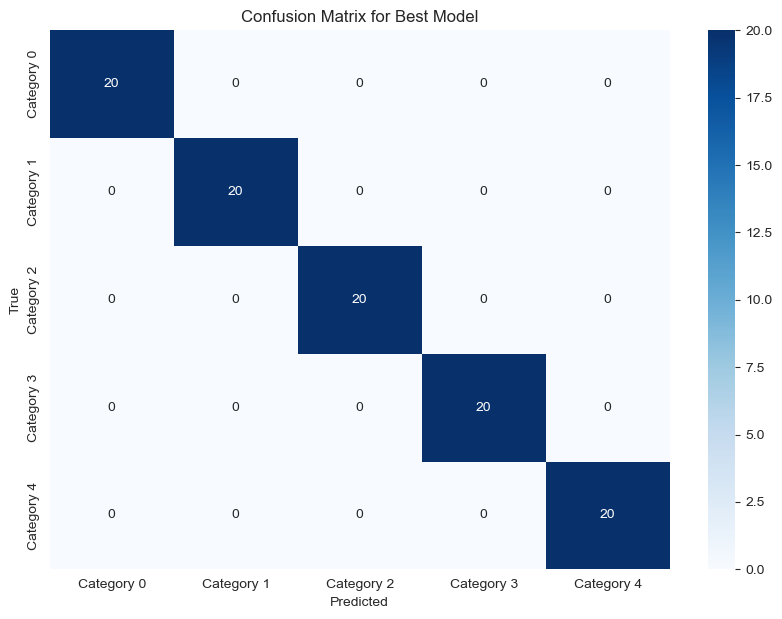

In [ ]:
# Evaluates the best model on the training-validation set
y_pred_best = best_model.predict(X)
print("Classification Report for Best Model:")
print(classification_report(y, y_pred_best))
print("Confusion Matrix for Best Model:")
print(confusion_matrix(y, y_pred_best))
accuracy_best = accuracy_score(y, y_pred_best)
print(f"Accuracy for Best Model: {accuracy_best:.2f}")
# Confusion matrix for the best model
plt.figure(figsize=(10, 7))
cm_best = confusion_matrix(y, y_pred_best)
sns.heatmap(cm_best, annot=True, fmt='d', cmap='Blues', xticklabels=['Category 0', 'Category 1', 'Category 2', 'Category 3', 'Category 4'], yticklabels=['Category 0', 'Category 1', 'Category 2', 'Category 3', 'Category 4'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Best Model')
plt.show()

# Feature Importance Analysis

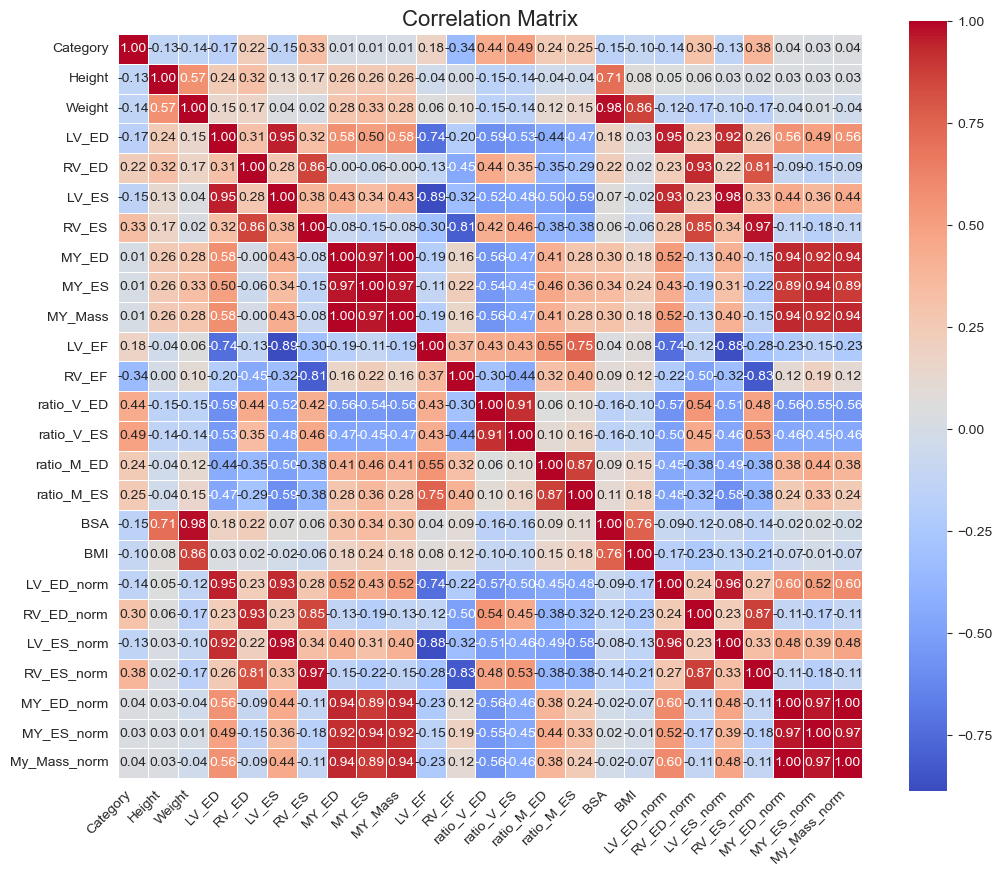

In [46]:
correlation_matrix = df_final_train.corr()

# Plots correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True,annot_kws={"size": 10}, cmap='coolwarm',fmt='.2f',linewidths=0.5,square=True )
plt.title("Correlation Matrix", fontsize=16)
plt.xticks(fontsize=10, rotation=45, ha='right')
plt.yticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

/var/folders/55/d0mg54z905g7mdwb_1x62zpw0000gn/T/ipykernel_8329/1652332312.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Feature', y='Importance', data=feature_importance, palette='viridis')


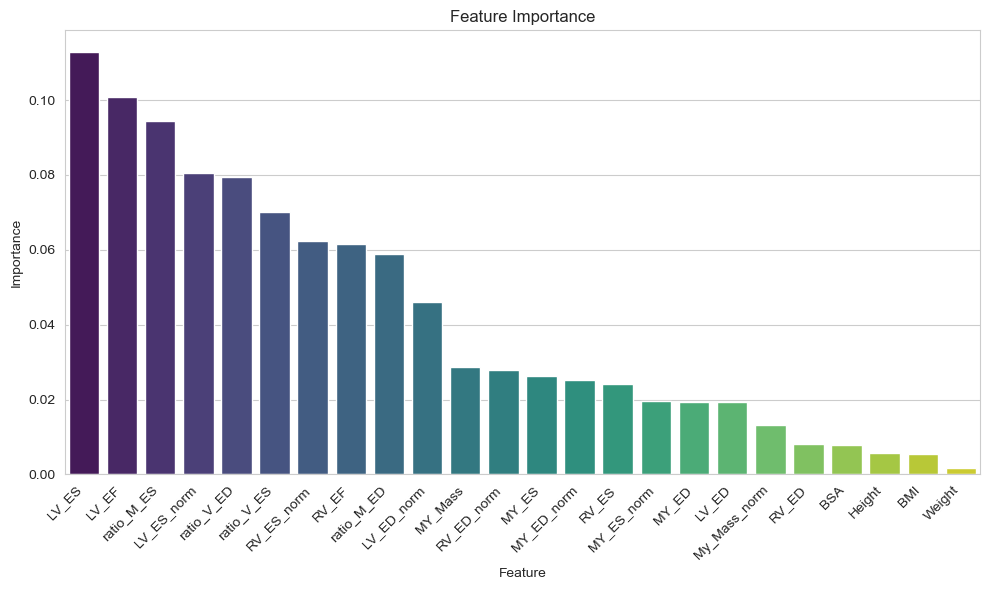

In [47]:
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': best_model.feature_importances_
}).sort_values(by='Importance', ascending=False)
top_10_features = feature_importance.head(15)
# Plots feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Feature', y='Importance', data=feature_importance, palette='viridis')
plt.title("Feature Importance")
plt.xticks(rotation=45,ha='right')
plt.tight_layout()
plt.show()

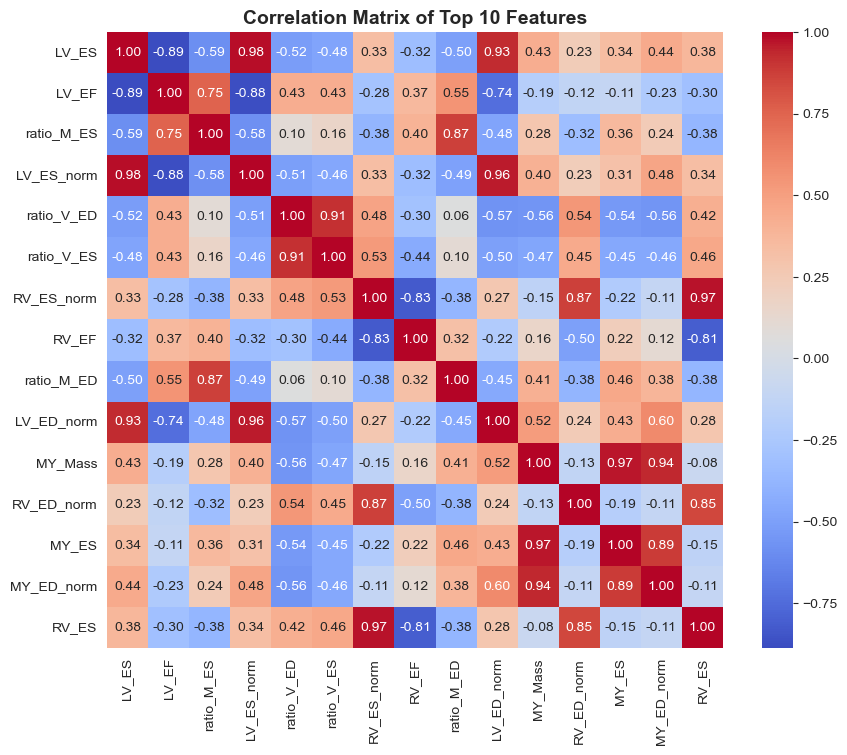

In [48]:
X_top_10 = df_final_train[top_10_features['Feature']]

correlation_matrix_top_10 = X_top_10.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_top_10, annot=True, fmt='.2f', cmap='coolwarm', cbar=True, square=True)
plt.title("Correlation Matrix of Top 10 Features", fontsize=14, fontweight='bold')
plt.show()

## Each Class

(100, 24, 5)

SHAP Summary Plot for Class 0
(100, 24)


/opt/homebrew/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


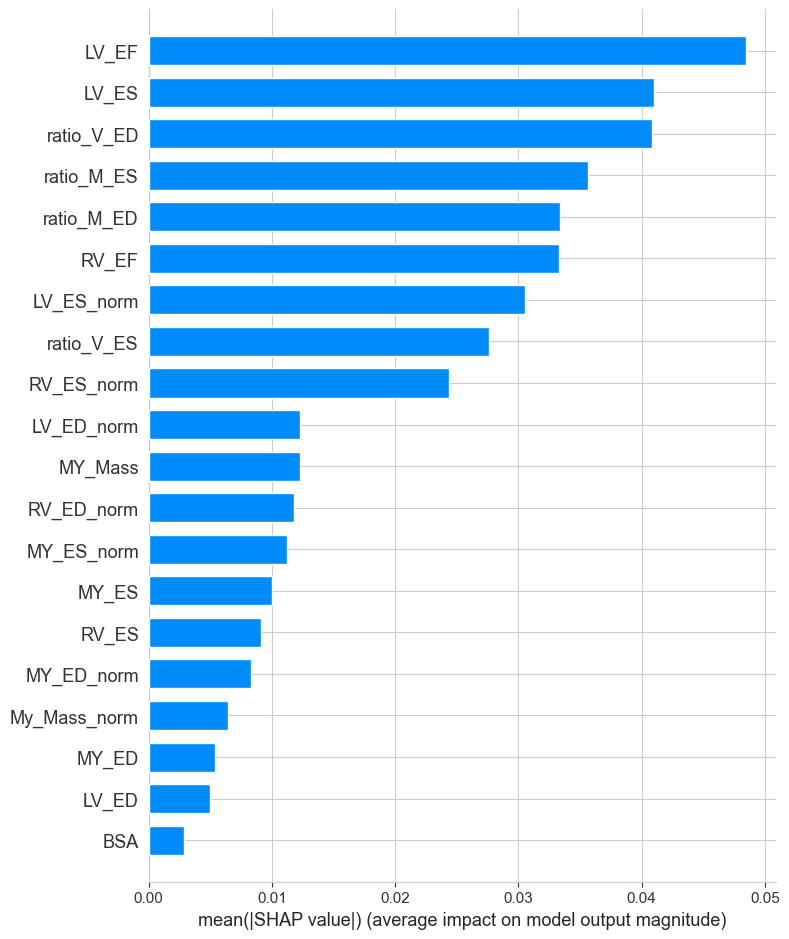


SHAP Summary Plot for Class 1
(100, 24)


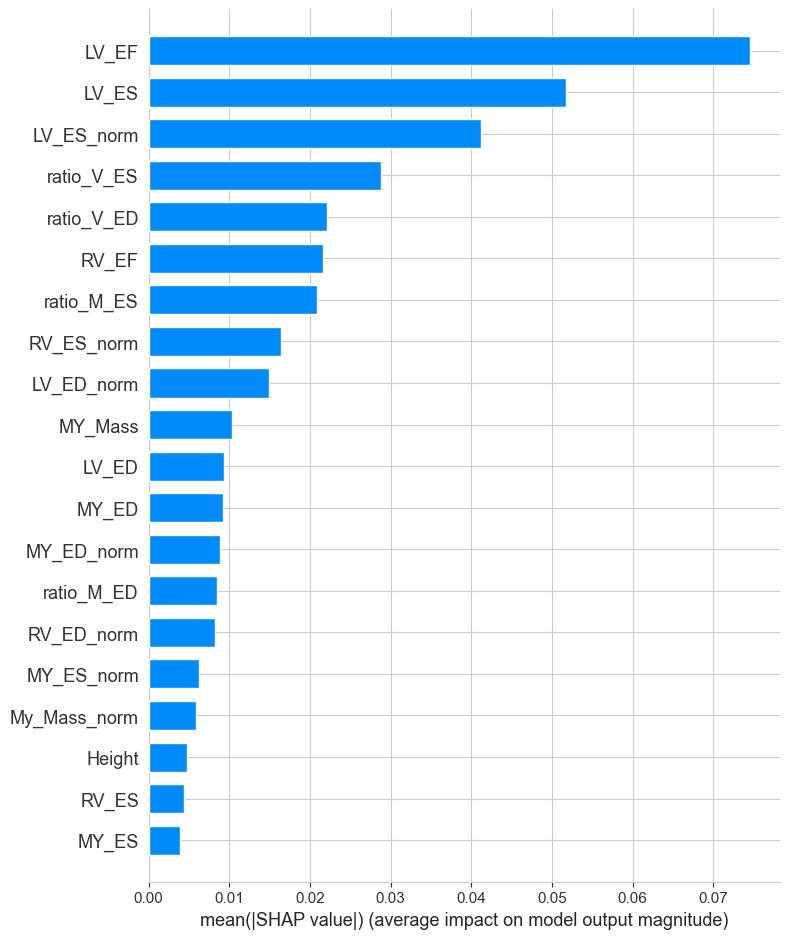


SHAP Summary Plot for Class 2
(100, 24)


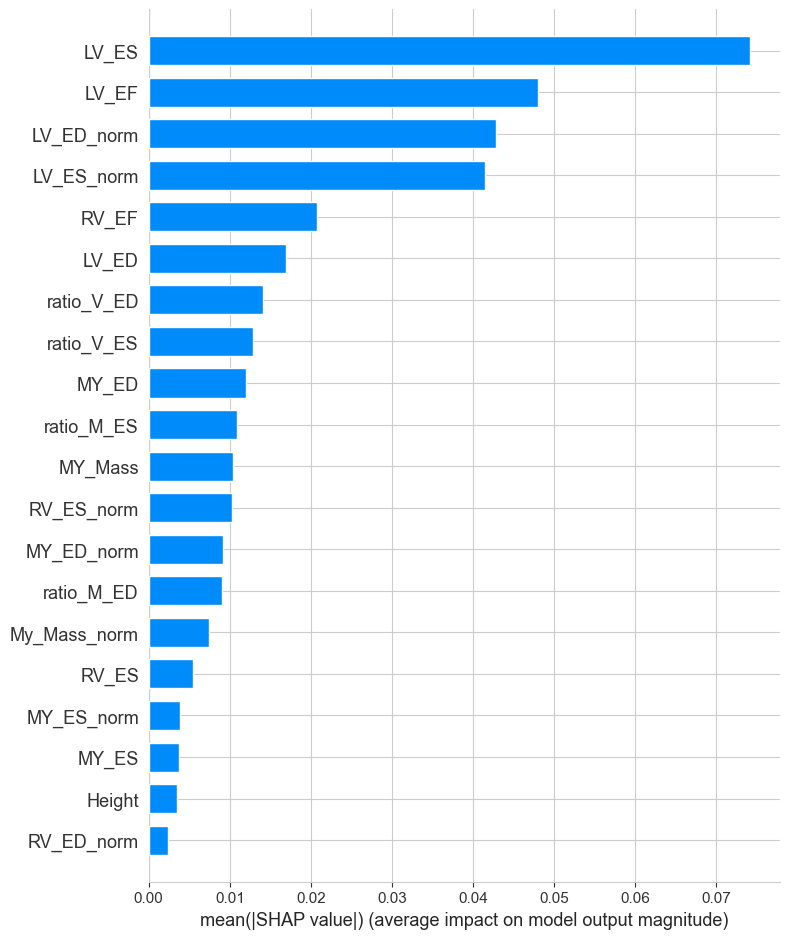


SHAP Summary Plot for Class 3
(100, 24)


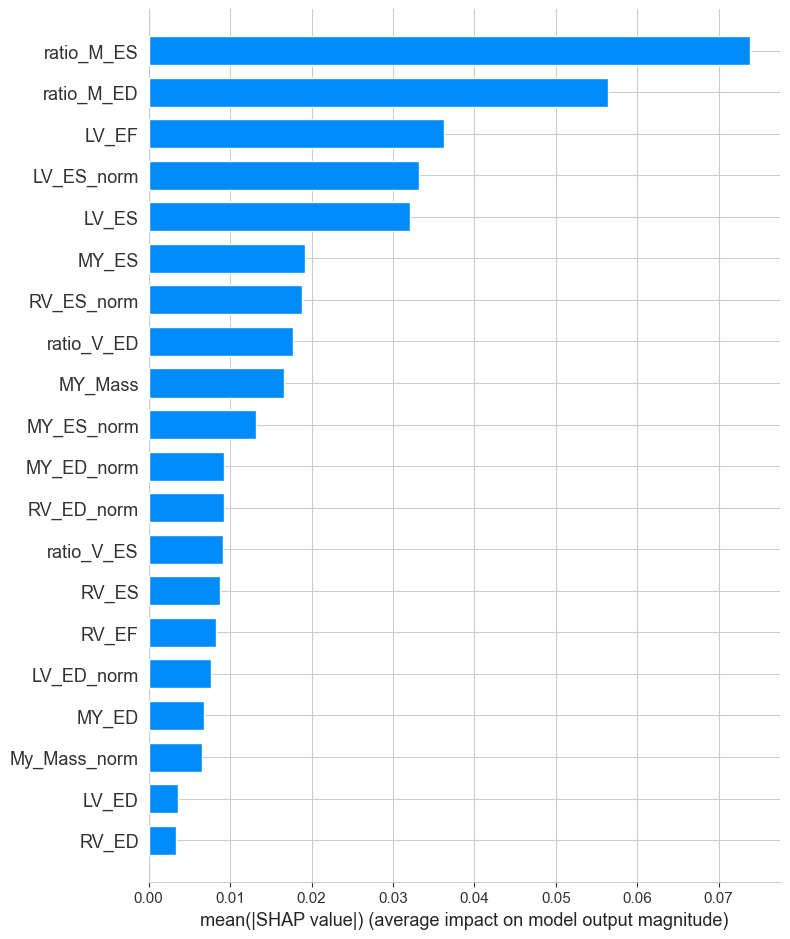


SHAP Summary Plot for Class 4
(100, 24)


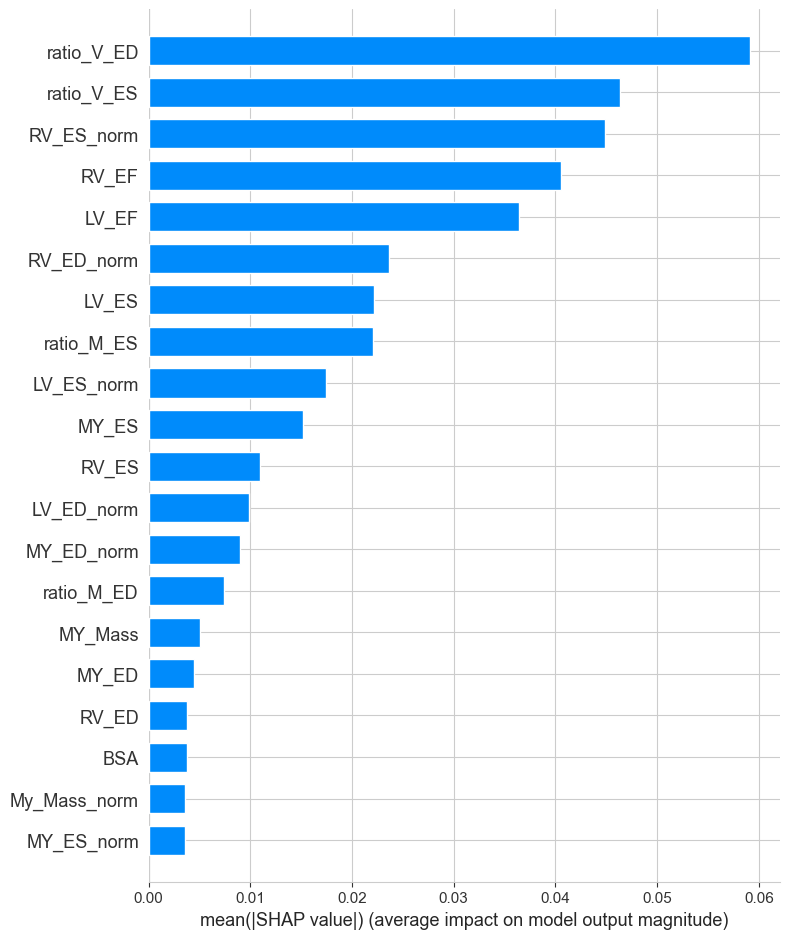

In [49]:
import shap

explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X)


if not isinstance(X, pd.DataFrame):
    X = pd.DataFrame(X, columns=[f"Feature {i}" for i in range(X.shape[1])])

# Plots SHAP summary plot for each class
print(shap_values.shape)
for i in range(shap_values.shape[2]):
    class_shap_values = shap_values[:, :, i]
    print(f"\nSHAP Summary Plot for Class {i}")
    print(class_shap_values.shape)
    shap.summary_plot(class_shap_values, X, plot_type="bar", cmap="viridis",show=True)
    plt.title(f"Class {i}")
    plt.close()


# Pre-Process test data

In [50]:
df_test = pd.read_csv(os.path.join(path_initial, 'metaDataTest.csv'))

In [51]:
df_final_test = create_test_dataframe(path_test,df_test)
df_final_test_clean = df_final_test.drop(columns=['Id'])

In [55]:
df_final_test_clean

,Height,Weight,LV_ED,RV_ED,LV_ES,RV_ES,MY_ED,MY_ES,MY_Mass,LV_EF,...,ratio_M_ES,BSA,BMI,LV_ED_norm,RV_ED_norm,LV_ES_norm,RV_ES_norm,MY_ED_norm,MY_ES_norm,My_Mass_norm
0,170.0,70.0,106996.327911,125548.821342,29591.447361,66850.671104,98160.757999,126606.445671,103068.795899,72.343493,...,4.278481,1.818119,0.002422,58850.023790,69054.249497,16275.861192,36769.145836,53990.291595,69635.963076,56689.806175
1,162.0,60.0,137240.172787,233212.024584,51787.141743,117958.027611,81517.321529,79775.982428,85593.187606,62.265319,...,1.540459,1.643168,0.002286,83521.709368,141928.318384,31516.650801,71786.969512,49609.862032,48550.116803,52090.355134
2,185.0,104.0,111130.981445,138266.159058,41966.567993,75598.312378,118024.444580,132354.492188,123925.666809,62.236842,...,3.153808,2.311805,0.003039,48071.078553,59808.734763,18153.157295,32700.983700,51052.931169,57251.570246,53605.577728
3,158.0,56.0,117834.905518,115461.010689,29776.491829,53440.671776,80413.350815,98245.600159,84434.018356,74.730330,...,3.299435,1.567730,0.002243,75162.748262,73648.524114,18993.378487,34087.927868,51292.852637,62667.418284,53857.495269
4,164.0,64.0,241516.845703,228722.167969,210251.953125,158677.734375,117841.552734,120372.802734,123733.630371,12.945222,...,0.572517,1.707500,0.002380,141444.728823,133951.505246,123134.394240,92929.870145,69014.094740,70496.525370,72464.799477
5,175.0,107.0,178173.828125,88891.601562,131762.695312,34130.859375,173754.882812,174365.234375,182442.626953,26.048232,...,1.323328,2.280655,0.003494,78123.959869,38976.341173,57774.049248,14965.373513,76186.382898,76454.004027,79995.702043
6,180.0,60.0,158813.476562,219580.078125,75634.765625,145483.398438,96679.687500,98242.187500,101513.671875,52.375096,...,1.298903,1.732051,0.001852,91691.003444,126774.617214,43667.752294,83994.879251,55818.043603,56720.153399,58608.945783
7,163.0,80.0,271764.227684,181687.068787,235931.500229,155723.762352,146788.945595,149723.602982,154128.392875,13.185226,...,0.634606,1.903214,0.003011,142792.285437,95463.306586,123964.799971,81821.482219,77126.887512,78668.835983,80983.231888
8,172.0,90.0,222361.046326,188210.606544,121872.395935,65796.140137,147667.473602,148097.391563,155050.847282,45.191661,...,1.215184,2.073644,0.003042,107232.018521,90763.214062,58772.088160,31729.716307,71211.579213,71418.904064,74772.158173
9,170.0,74.0,171599.547318,160670.762589,66343.892780,88135.360718,99350.585369,111975.975792,104318.114638,61.337956,...,1.687811,1.869343,0.002561,91796.699712,85950.376772,35490.480590,47147.765646,53147.318824,59901.236253,55804.684765


In [56]:
X_test = df_final_test_clean

In [57]:
y_test = best_model.predict(X_test)

In [58]:
y_test

array([0, 4, 3, 0, 2, 1, 4, 2, 1, 0, 3, 2, 1, 4, 3, 2, 4, 4, 4, 2, 0, 1,
       0, 1, 3, 2, 4, 0, 3, 3, 0, 1, 2, 3, 2, 3, 3, 2, 4, 3, 1, 2, 3, 0,
       1, 4, 2, 4, 1, 4])

In [66]:
y_test_df = pd.DataFrame({"Id": df_final_test['Id'], "Category": y_test})
output_path = os.path.join(path_initial, 'Submission24.csv')
y_test_df.to_csv(output_path, index=False)
print(f"Predictions saved to {output_path}")

Predictions saved to /content/drive/MyDrive/dataset/Submission24.csv


## Multi Layer Perceptron

In [67]:
import torch
import torch.nn as nn
import torch.nn.functional as F

## Building an MLP

**Use Google Colab to run this part**

**Gaussian Noise Layer**

In [68]:
class GaussianNoise(nn.Module):

    def __init__(self,sigma=0.1):
        super().__init__()
        self.sigma = sigma

    def forward(self, x):
        if self.training:
            noise = torch.randn_like(x) * self.sigma
            return x + noise
        return x

**MLP Architecture**

In [69]:
class CardiacMLP(nn.Module):

    def __init__(self,input_dim,num_classes = 5):

        super().__init__()

        self.model = nn.Sequential(
            nn.Linear(input_dim,32),
            nn.BatchNorm1d(32),
            nn.LeakyReLU(),
            GaussianNoise(sigma=0.1),

            nn.Linear(32,32),
            nn.BatchNorm1d(32),
            nn.LeakyReLU(),
            GaussianNoise(sigma=0.1),

            nn.Linear(32,32),
            nn.BatchNorm1d(32),
            nn.LeakyReLU(),
            GaussianNoise(sigma=0.1),

            nn.Linear(32,32),
            nn.BatchNorm1d(32),
            nn.LeakyReLU(),
            GaussianNoise(sigma=0.1),

            nn.Linear(32,num_classes)
        )

    def forward(self,x):
        return self.model(x)



**Training**

In [70]:
from sklearn.preprocessing import OneHotEncoder

In [71]:
y_np = y.to_numpy()
encoder = OneHotEncoder(sparse_output=False)
y_MLP = encoder.fit_transform(y_np.reshape(-1, 1))

In [72]:
y_MLP

array([[0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 0.

In [73]:
y

,Category
0,4
1,1
2,0
3,1
4,1
...,...
95,0
96,0
97,2
98,4


In [74]:
len(y_MLP)

100

In [76]:
def prediction_accuracy(predict,labels):
  accuracy = (predict == labels).sum()/(labels.shape[0])
  return accuracy

In [77]:
model = CardiacMLP(input_dim = X_scaled.shape[1], num_classes = 5)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

num_epochs = 200
batch_size = 15
train_dataset = torch.utils.data.TensorDataset(torch.tensor(X_scaled, dtype=torch.float32).to(device), torch.tensor(y_MLP, dtype=torch.float64).to(device))
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)



In [78]:
model.train()

for epoch in range(0,num_epochs):
  train_loss=0.0
  all_labels = []
  all_predicted = []

  with tqdm(train_loader, unit="batch") as tepoch:
    for data, labels in tepoch:
      tepoch.set_description(f"Epoch {epoch}")

      # Put the data on device
      data = data.to(device)
      labels = labels.to(device)

      # BEGIN STUDENT CODE: forward and backward passes

      # 1. Do the forward pass
      y_predict = model(data)

      # 2. Compute the loss
      loss = criterion(y_predict,labels)

      # 3. Reset gradients to 0
      optimizer.zero_grad()

      # 4. Do the backward pass
      loss.backward()

      # 5. Call the parameter update
      optimizer.step()

      # END STUDENT CODE

      # Compute the loss
      train_loss += loss.item()
      # Store labels and class predictions
      all_labels.extend(torch.argmax(labels,dim=1).tolist())
      #print(all_labels)
      all_predicted.extend((torch.argmax(y_predict,dim=1)).tolist())
      #print(all_predicted)


  print('Epoch {}: Train Loss: {:.4f}'.format(epoch, train_loss/len(train_loader.dataset)))
  print('Epoch {}: Train Accuracy: {:.4f}'.format(epoch, prediction_accuracy(np.array(all_predicted),np.array(all_labels))))

Epoch 0: 100%|██████████| 7/7 [00:00<00:00,  8.79batch/s]


Epoch 0: Train Loss: 0.1158
Epoch 0: Train Accuracy: 0.1900


Epoch 1: 100%|██████████| 7/7 [00:00<00:00, 192.40batch/s]


Epoch 1: Train Loss: 0.1021
Epoch 1: Train Accuracy: 0.3500


Epoch 2: 100%|██████████| 7/7 [00:00<00:00, 206.68batch/s]


Epoch 2: Train Loss: 0.0900
Epoch 2: Train Accuracy: 0.5700


Epoch 3: 100%|██████████| 7/7 [00:00<00:00, 227.20batch/s]


Epoch 3: Train Loss: 0.0819
Epoch 3: Train Accuracy: 0.7000


Epoch 4: 100%|██████████| 7/7 [00:00<00:00, 222.55batch/s]


Epoch 4: Train Loss: 0.0757
Epoch 4: Train Accuracy: 0.7200


Epoch 5: 100%|██████████| 7/7 [00:00<00:00, 224.02batch/s]


Epoch 5: Train Loss: 0.0712
Epoch 5: Train Accuracy: 0.7700


Epoch 6: 100%|██████████| 7/7 [00:00<00:00, 222.59batch/s]


Epoch 6: Train Loss: 0.0660
Epoch 6: Train Accuracy: 0.7900


Epoch 7: 100%|██████████| 7/7 [00:00<00:00, 148.43batch/s]


Epoch 7: Train Loss: 0.0598
Epoch 7: Train Accuracy: 0.8000


Epoch 8: 100%|██████████| 7/7 [00:00<00:00, 207.49batch/s]


Epoch 8: Train Loss: 0.0519
Epoch 8: Train Accuracy: 0.9000


Epoch 9: 100%|██████████| 7/7 [00:00<00:00, 216.94batch/s]


Epoch 9: Train Loss: 0.0501
Epoch 9: Train Accuracy: 0.8600


Epoch 10: 100%|██████████| 7/7 [00:00<00:00, 214.37batch/s]


Epoch 10: Train Loss: 0.0502
Epoch 10: Train Accuracy: 0.8600


Epoch 11: 100%|██████████| 7/7 [00:00<00:00, 203.64batch/s]


Epoch 11: Train Loss: 0.0421
Epoch 11: Train Accuracy: 0.9300


Epoch 12: 100%|██████████| 7/7 [00:00<00:00, 213.53batch/s]


Epoch 12: Train Loss: 0.0444
Epoch 12: Train Accuracy: 0.8500


Epoch 13: 100%|██████████| 7/7 [00:00<00:00, 212.52batch/s]


Epoch 13: Train Loss: 0.0363
Epoch 13: Train Accuracy: 0.9200


Epoch 14: 100%|██████████| 7/7 [00:00<00:00, 191.90batch/s]


Epoch 14: Train Loss: 0.0356
Epoch 14: Train Accuracy: 0.9000


Epoch 15: 100%|██████████| 7/7 [00:00<00:00, 198.04batch/s]


Epoch 15: Train Loss: 0.0358
Epoch 15: Train Accuracy: 0.9100


Epoch 16: 100%|██████████| 7/7 [00:00<00:00, 215.24batch/s]


Epoch 16: Train Loss: 0.0324
Epoch 16: Train Accuracy: 0.9000


Epoch 17: 100%|██████████| 7/7 [00:00<00:00, 192.52batch/s]


Epoch 17: Train Loss: 0.0280
Epoch 17: Train Accuracy: 0.9500


Epoch 18: 100%|██████████| 7/7 [00:00<00:00, 191.99batch/s]


Epoch 18: Train Loss: 0.0339
Epoch 18: Train Accuracy: 0.8800


Epoch 19: 100%|██████████| 7/7 [00:00<00:00, 221.91batch/s]


Epoch 19: Train Loss: 0.0340
Epoch 19: Train Accuracy: 0.8900


Epoch 20: 100%|██████████| 7/7 [00:00<00:00, 190.25batch/s]


Epoch 20: Train Loss: 0.0323
Epoch 20: Train Accuracy: 0.8700


Epoch 21: 100%|██████████| 7/7 [00:00<00:00, 212.87batch/s]


Epoch 21: Train Loss: 0.0326
Epoch 21: Train Accuracy: 0.9000


Epoch 22: 100%|██████████| 7/7 [00:00<00:00, 219.75batch/s]


Epoch 22: Train Loss: 0.0189
Epoch 22: Train Accuracy: 0.9800


Epoch 23: 100%|██████████| 7/7 [00:00<00:00, 216.19batch/s]


Epoch 23: Train Loss: 0.0254
Epoch 23: Train Accuracy: 0.9300


Epoch 24: 100%|██████████| 7/7 [00:00<00:00, 212.37batch/s]


Epoch 24: Train Loss: 0.0220
Epoch 24: Train Accuracy: 0.9200


Epoch 25: 100%|██████████| 7/7 [00:00<00:00, 202.58batch/s]


Epoch 25: Train Loss: 0.0290
Epoch 25: Train Accuracy: 0.9000


Epoch 26: 100%|██████████| 7/7 [00:00<00:00, 218.28batch/s]


Epoch 26: Train Loss: 0.0270
Epoch 26: Train Accuracy: 0.9000


Epoch 27: 100%|██████████| 7/7 [00:00<00:00, 195.48batch/s]


Epoch 27: Train Loss: 0.0277
Epoch 27: Train Accuracy: 0.8600


Epoch 28: 100%|██████████| 7/7 [00:00<00:00, 195.28batch/s]


Epoch 28: Train Loss: 0.0192
Epoch 28: Train Accuracy: 0.9500


Epoch 29: 100%|██████████| 7/7 [00:00<00:00, 226.20batch/s]


Epoch 29: Train Loss: 0.0281
Epoch 29: Train Accuracy: 0.8700


Epoch 30: 100%|██████████| 7/7 [00:00<00:00, 196.45batch/s]


Epoch 30: Train Loss: 0.0203
Epoch 30: Train Accuracy: 0.9200


Epoch 31: 100%|██████████| 7/7 [00:00<00:00, 197.37batch/s]


Epoch 31: Train Loss: 0.0245
Epoch 31: Train Accuracy: 0.9200


Epoch 32: 100%|██████████| 7/7 [00:00<00:00, 215.17batch/s]


Epoch 32: Train Loss: 0.0271
Epoch 32: Train Accuracy: 0.9000


Epoch 33: 100%|██████████| 7/7 [00:00<00:00, 193.76batch/s]


Epoch 33: Train Loss: 0.0267
Epoch 33: Train Accuracy: 0.8900


Epoch 34: 100%|██████████| 7/7 [00:00<00:00, 176.13batch/s]


Epoch 34: Train Loss: 0.0325
Epoch 34: Train Accuracy: 0.8500


Epoch 35: 100%|██████████| 7/7 [00:00<00:00, 166.23batch/s]


Epoch 35: Train Loss: 0.0283
Epoch 35: Train Accuracy: 0.8900


Epoch 36: 100%|██████████| 7/7 [00:00<00:00, 230.84batch/s]


Epoch 36: Train Loss: 0.0150
Epoch 36: Train Accuracy: 0.9500


Epoch 37: 100%|██████████| 7/7 [00:00<00:00, 186.18batch/s]


Epoch 37: Train Loss: 0.0165
Epoch 37: Train Accuracy: 0.9500


Epoch 38: 100%|██████████| 7/7 [00:00<00:00, 204.24batch/s]


Epoch 38: Train Loss: 0.0234
Epoch 38: Train Accuracy: 0.9200


Epoch 39: 100%|██████████| 7/7 [00:00<00:00, 226.19batch/s]


Epoch 39: Train Loss: 0.0168
Epoch 39: Train Accuracy: 0.9300


Epoch 40: 100%|██████████| 7/7 [00:00<00:00, 177.97batch/s]


Epoch 40: Train Loss: 0.0152
Epoch 40: Train Accuracy: 0.9600


Epoch 41: 100%|██████████| 7/7 [00:00<00:00, 174.34batch/s]


Epoch 41: Train Loss: 0.0184
Epoch 41: Train Accuracy: 0.9700


Epoch 42: 100%|██████████| 7/7 [00:00<00:00, 189.36batch/s]


Epoch 42: Train Loss: 0.0150
Epoch 42: Train Accuracy: 0.9600


Epoch 43: 100%|██████████| 7/7 [00:00<00:00, 219.44batch/s]


Epoch 43: Train Loss: 0.0178
Epoch 43: Train Accuracy: 0.9300


Epoch 44: 100%|██████████| 7/7 [00:00<00:00, 199.49batch/s]


Epoch 44: Train Loss: 0.0092
Epoch 44: Train Accuracy: 0.9900


Epoch 45: 100%|██████████| 7/7 [00:00<00:00, 197.95batch/s]


Epoch 45: Train Loss: 0.0113
Epoch 45: Train Accuracy: 0.9800


Epoch 46: 100%|██████████| 7/7 [00:00<00:00, 211.15batch/s]


Epoch 46: Train Loss: 0.0288
Epoch 46: Train Accuracy: 0.8800


Epoch 47: 100%|██████████| 7/7 [00:00<00:00, 171.00batch/s]


Epoch 47: Train Loss: 0.0116
Epoch 47: Train Accuracy: 0.9700


Epoch 48: 100%|██████████| 7/7 [00:00<00:00, 179.51batch/s]


Epoch 48: Train Loss: 0.0164
Epoch 48: Train Accuracy: 0.9400


Epoch 49: 100%|██████████| 7/7 [00:00<00:00, 194.72batch/s]


Epoch 49: Train Loss: 0.0178
Epoch 49: Train Accuracy: 0.9400


Epoch 50: 100%|██████████| 7/7 [00:00<00:00, 210.13batch/s]


Epoch 50: Train Loss: 0.0185
Epoch 50: Train Accuracy: 0.9300


Epoch 51: 100%|██████████| 7/7 [00:00<00:00, 203.44batch/s]


Epoch 51: Train Loss: 0.0127
Epoch 51: Train Accuracy: 0.9700


Epoch 52: 100%|██████████| 7/7 [00:00<00:00, 209.58batch/s]


Epoch 52: Train Loss: 0.0141
Epoch 52: Train Accuracy: 0.9600


Epoch 53: 100%|██████████| 7/7 [00:00<00:00, 209.19batch/s]


Epoch 53: Train Loss: 0.0114
Epoch 53: Train Accuracy: 0.9600


Epoch 54: 100%|██████████| 7/7 [00:00<00:00, 187.37batch/s]


Epoch 54: Train Loss: 0.0145
Epoch 54: Train Accuracy: 0.9100


Epoch 55: 100%|██████████| 7/7 [00:00<00:00, 194.11batch/s]


Epoch 55: Train Loss: 0.0088
Epoch 55: Train Accuracy: 0.9700


Epoch 56: 100%|██████████| 7/7 [00:00<00:00, 191.28batch/s]


Epoch 56: Train Loss: 0.0075
Epoch 56: Train Accuracy: 0.9700


Epoch 57: 100%|██████████| 7/7 [00:00<00:00, 232.68batch/s]


Epoch 57: Train Loss: 0.0142
Epoch 57: Train Accuracy: 0.9700


Epoch 58: 100%|██████████| 7/7 [00:00<00:00, 177.58batch/s]


Epoch 58: Train Loss: 0.0129
Epoch 58: Train Accuracy: 0.9500


Epoch 59: 100%|██████████| 7/7 [00:00<00:00, 195.96batch/s]


Epoch 59: Train Loss: 0.0119
Epoch 59: Train Accuracy: 0.9600


Epoch 60: 100%|██████████| 7/7 [00:00<00:00, 195.45batch/s]


Epoch 60: Train Loss: 0.0123
Epoch 60: Train Accuracy: 0.9200


Epoch 61: 100%|██████████| 7/7 [00:00<00:00, 163.61batch/s]


Epoch 61: Train Loss: 0.0257
Epoch 61: Train Accuracy: 0.9100


Epoch 62: 100%|██████████| 7/7 [00:00<00:00, 185.45batch/s]


Epoch 62: Train Loss: 0.0090
Epoch 62: Train Accuracy: 0.9700


Epoch 63: 100%|██████████| 7/7 [00:00<00:00, 199.71batch/s]


Epoch 63: Train Loss: 0.0116
Epoch 63: Train Accuracy: 0.9600


Epoch 64: 100%|██████████| 7/7 [00:00<00:00, 191.63batch/s]


Epoch 64: Train Loss: 0.0115
Epoch 64: Train Accuracy: 0.9400


Epoch 65: 100%|██████████| 7/7 [00:00<00:00, 211.72batch/s]


Epoch 65: Train Loss: 0.0221
Epoch 65: Train Accuracy: 0.9000


Epoch 66: 100%|██████████| 7/7 [00:00<00:00, 187.84batch/s]


Epoch 66: Train Loss: 0.0111
Epoch 66: Train Accuracy: 0.9400


Epoch 67: 100%|██████████| 7/7 [00:00<00:00, 188.11batch/s]


Epoch 67: Train Loss: 0.0124
Epoch 67: Train Accuracy: 0.9600


Epoch 68: 100%|██████████| 7/7 [00:00<00:00, 197.15batch/s]


Epoch 68: Train Loss: 0.0068
Epoch 68: Train Accuracy: 0.9900


Epoch 69: 100%|██████████| 7/7 [00:00<00:00, 228.47batch/s]


Epoch 69: Train Loss: 0.0121
Epoch 69: Train Accuracy: 0.9500


Epoch 70: 100%|██████████| 7/7 [00:00<00:00, 176.21batch/s]


Epoch 70: Train Loss: 0.0144
Epoch 70: Train Accuracy: 0.9500


Epoch 71: 100%|██████████| 7/7 [00:00<00:00, 199.67batch/s]


Epoch 71: Train Loss: 0.0131
Epoch 71: Train Accuracy: 0.9200


Epoch 72: 100%|██████████| 7/7 [00:00<00:00, 199.87batch/s]


Epoch 72: Train Loss: 0.0151
Epoch 72: Train Accuracy: 0.9400


Epoch 73: 100%|██████████| 7/7 [00:00<00:00, 195.60batch/s]


Epoch 73: Train Loss: 0.0097
Epoch 73: Train Accuracy: 0.9600


Epoch 74: 100%|██████████| 7/7 [00:00<00:00, 193.95batch/s]


Epoch 74: Train Loss: 0.0097
Epoch 74: Train Accuracy: 0.9500


Epoch 75: 100%|██████████| 7/7 [00:00<00:00, 202.05batch/s]


Epoch 75: Train Loss: 0.0071
Epoch 75: Train Accuracy: 0.9700


Epoch 76: 100%|██████████| 7/7 [00:00<00:00, 204.30batch/s]


Epoch 76: Train Loss: 0.0194
Epoch 76: Train Accuracy: 0.9300


Epoch 77: 100%|██████████| 7/7 [00:00<00:00, 200.03batch/s]


Epoch 77: Train Loss: 0.0185
Epoch 77: Train Accuracy: 0.9400


Epoch 78: 100%|██████████| 7/7 [00:00<00:00, 228.56batch/s]


Epoch 78: Train Loss: 0.0143
Epoch 78: Train Accuracy: 0.9200


Epoch 79: 100%|██████████| 7/7 [00:00<00:00, 179.53batch/s]


Epoch 79: Train Loss: 0.0239
Epoch 79: Train Accuracy: 0.9000


Epoch 80: 100%|██████████| 7/7 [00:00<00:00, 185.73batch/s]


Epoch 80: Train Loss: 0.0166
Epoch 80: Train Accuracy: 0.9300


Epoch 81: 100%|██████████| 7/7 [00:00<00:00, 207.57batch/s]


Epoch 81: Train Loss: 0.0116
Epoch 81: Train Accuracy: 0.9500


Epoch 82: 100%|██████████| 7/7 [00:00<00:00, 205.44batch/s]


Epoch 82: Train Loss: 0.0069
Epoch 82: Train Accuracy: 0.9700


Epoch 83: 100%|██████████| 7/7 [00:00<00:00, 202.69batch/s]


Epoch 83: Train Loss: 0.0128
Epoch 83: Train Accuracy: 0.9500


Epoch 84: 100%|██████████| 7/7 [00:00<00:00, 207.93batch/s]


Epoch 84: Train Loss: 0.0115
Epoch 84: Train Accuracy: 0.9800


Epoch 85: 100%|██████████| 7/7 [00:00<00:00, 198.08batch/s]


Epoch 85: Train Loss: 0.0109
Epoch 85: Train Accuracy: 0.9300


Epoch 86: 100%|██████████| 7/7 [00:00<00:00, 177.74batch/s]


Epoch 86: Train Loss: 0.0119
Epoch 86: Train Accuracy: 0.9000


Epoch 87: 100%|██████████| 7/7 [00:00<00:00, 181.12batch/s]


Epoch 87: Train Loss: 0.0125
Epoch 87: Train Accuracy: 0.9300


Epoch 88: 100%|██████████| 7/7 [00:00<00:00, 151.65batch/s]


Epoch 88: Train Loss: 0.0095
Epoch 88: Train Accuracy: 0.9700


Epoch 89: 100%|██████████| 7/7 [00:00<00:00, 214.74batch/s]


Epoch 89: Train Loss: 0.0148
Epoch 89: Train Accuracy: 0.9300


Epoch 90: 100%|██████████| 7/7 [00:00<00:00, 187.09batch/s]


Epoch 90: Train Loss: 0.0161
Epoch 90: Train Accuracy: 0.9200


Epoch 91: 100%|██████████| 7/7 [00:00<00:00, 204.03batch/s]


Epoch 91: Train Loss: 0.0116
Epoch 91: Train Accuracy: 0.9500


Epoch 92: 100%|██████████| 7/7 [00:00<00:00, 164.91batch/s]


Epoch 92: Train Loss: 0.0063
Epoch 92: Train Accuracy: 0.9800


Epoch 93: 100%|██████████| 7/7 [00:00<00:00, 191.12batch/s]


Epoch 93: Train Loss: 0.0098
Epoch 93: Train Accuracy: 0.9400


Epoch 94: 100%|██████████| 7/7 [00:00<00:00, 185.74batch/s]


Epoch 94: Train Loss: 0.0238
Epoch 94: Train Accuracy: 0.8600


Epoch 95: 100%|██████████| 7/7 [00:00<00:00, 187.46batch/s]


Epoch 95: Train Loss: 0.0160
Epoch 95: Train Accuracy: 0.9300


Epoch 96: 100%|██████████| 7/7 [00:00<00:00, 202.92batch/s]


Epoch 96: Train Loss: 0.0113
Epoch 96: Train Accuracy: 0.9700


Epoch 97: 100%|██████████| 7/7 [00:00<00:00, 196.64batch/s]


Epoch 97: Train Loss: 0.0214
Epoch 97: Train Accuracy: 0.8800


Epoch 98: 100%|██████████| 7/7 [00:00<00:00, 171.61batch/s]


Epoch 98: Train Loss: 0.0077
Epoch 98: Train Accuracy: 0.9800


Epoch 99: 100%|██████████| 7/7 [00:00<00:00, 182.29batch/s]


Epoch 99: Train Loss: 0.0132
Epoch 99: Train Accuracy: 0.9400


Epoch 100: 100%|██████████| 7/7 [00:00<00:00, 209.89batch/s]


Epoch 100: Train Loss: 0.0142
Epoch 100: Train Accuracy: 0.9300


Epoch 101: 100%|██████████| 7/7 [00:00<00:00, 188.07batch/s]


Epoch 101: Train Loss: 0.0292
Epoch 101: Train Accuracy: 0.8600


Epoch 102: 100%|██████████| 7/7 [00:00<00:00, 191.50batch/s]


Epoch 102: Train Loss: 0.0084
Epoch 102: Train Accuracy: 0.9800


Epoch 103: 100%|██████████| 7/7 [00:00<00:00, 236.87batch/s]


Epoch 103: Train Loss: 0.0097
Epoch 103: Train Accuracy: 0.9500


Epoch 104: 100%|██████████| 7/7 [00:00<00:00, 169.13batch/s]


Epoch 104: Train Loss: 0.0102
Epoch 104: Train Accuracy: 0.9500


Epoch 105: 100%|██████████| 7/7 [00:00<00:00, 175.42batch/s]


Epoch 105: Train Loss: 0.0065
Epoch 105: Train Accuracy: 0.9800


Epoch 106: 100%|██████████| 7/7 [00:00<00:00, 195.80batch/s]


Epoch 106: Train Loss: 0.0047
Epoch 106: Train Accuracy: 1.0000


Epoch 107: 100%|██████████| 7/7 [00:00<00:00, 211.96batch/s]


Epoch 107: Train Loss: 0.0105
Epoch 107: Train Accuracy: 0.9600


Epoch 108: 100%|██████████| 7/7 [00:00<00:00, 175.16batch/s]


Epoch 108: Train Loss: 0.0215
Epoch 108: Train Accuracy: 0.9200


Epoch 109: 100%|██████████| 7/7 [00:00<00:00, 191.19batch/s]


Epoch 109: Train Loss: 0.0173
Epoch 109: Train Accuracy: 0.9000


Epoch 110: 100%|██████████| 7/7 [00:00<00:00, 196.95batch/s]


Epoch 110: Train Loss: 0.0145
Epoch 110: Train Accuracy: 0.9300


Epoch 111: 100%|██████████| 7/7 [00:00<00:00, 181.41batch/s]


Epoch 111: Train Loss: 0.0124
Epoch 111: Train Accuracy: 0.9700


Epoch 112: 100%|██████████| 7/7 [00:00<00:00, 188.14batch/s]


Epoch 112: Train Loss: 0.0055
Epoch 112: Train Accuracy: 0.9800


Epoch 113: 100%|██████████| 7/7 [00:00<00:00, 196.24batch/s]


Epoch 113: Train Loss: 0.0066
Epoch 113: Train Accuracy: 0.9800


Epoch 114: 100%|██████████| 7/7 [00:00<00:00, 135.90batch/s]


Epoch 114: Train Loss: 0.0215
Epoch 114: Train Accuracy: 0.9000


Epoch 115: 100%|██████████| 7/7 [00:00<00:00, 142.27batch/s]


Epoch 115: Train Loss: 0.0069
Epoch 115: Train Accuracy: 0.9800


Epoch 116: 100%|██████████| 7/7 [00:00<00:00, 132.49batch/s]


Epoch 116: Train Loss: 0.0093
Epoch 116: Train Accuracy: 0.9600


Epoch 117: 100%|██████████| 7/7 [00:00<00:00, 148.83batch/s]


Epoch 117: Train Loss: 0.0058
Epoch 117: Train Accuracy: 0.9800


Epoch 118: 100%|██████████| 7/7 [00:00<00:00, 161.01batch/s]


Epoch 118: Train Loss: 0.0085
Epoch 118: Train Accuracy: 0.9500


Epoch 119: 100%|██████████| 7/7 [00:00<00:00, 181.25batch/s]


Epoch 119: Train Loss: 0.0060
Epoch 119: Train Accuracy: 0.9600


Epoch 120: 100%|██████████| 7/7 [00:00<00:00, 153.67batch/s]


Epoch 120: Train Loss: 0.0162
Epoch 120: Train Accuracy: 0.9500


Epoch 121: 100%|██████████| 7/7 [00:00<00:00, 172.84batch/s]


Epoch 121: Train Loss: 0.0101
Epoch 121: Train Accuracy: 0.9600


Epoch 122: 100%|██████████| 7/7 [00:00<00:00, 162.85batch/s]


Epoch 122: Train Loss: 0.0068
Epoch 122: Train Accuracy: 0.9700


Epoch 123: 100%|██████████| 7/7 [00:00<00:00, 162.80batch/s]


Epoch 123: Train Loss: 0.0093
Epoch 123: Train Accuracy: 0.9500


Epoch 124: 100%|██████████| 7/7 [00:00<00:00, 165.47batch/s]


Epoch 124: Train Loss: 0.0064
Epoch 124: Train Accuracy: 0.9900


Epoch 125: 100%|██████████| 7/7 [00:00<00:00, 156.46batch/s]


Epoch 125: Train Loss: 0.0128
Epoch 125: Train Accuracy: 0.9400


Epoch 126: 100%|██████████| 7/7 [00:00<00:00, 143.82batch/s]


Epoch 126: Train Loss: 0.0077
Epoch 126: Train Accuracy: 0.9800


Epoch 127: 100%|██████████| 7/7 [00:00<00:00, 145.24batch/s]


Epoch 127: Train Loss: 0.0064
Epoch 127: Train Accuracy: 0.9600


Epoch 128: 100%|██████████| 7/7 [00:00<00:00, 165.32batch/s]


Epoch 128: Train Loss: 0.0090
Epoch 128: Train Accuracy: 0.9700


Epoch 129: 100%|██████████| 7/7 [00:00<00:00, 119.46batch/s]


Epoch 129: Train Loss: 0.0137
Epoch 129: Train Accuracy: 0.9400


Epoch 130: 100%|██████████| 7/7 [00:00<00:00, 145.79batch/s]


Epoch 130: Train Loss: 0.0057
Epoch 130: Train Accuracy: 0.9800


Epoch 131: 100%|██████████| 7/7 [00:00<00:00, 171.54batch/s]


Epoch 131: Train Loss: 0.0063
Epoch 131: Train Accuracy: 0.9800


Epoch 132: 100%|██████████| 7/7 [00:00<00:00, 177.75batch/s]


Epoch 132: Train Loss: 0.0129
Epoch 132: Train Accuracy: 0.9400


Epoch 133: 100%|██████████| 7/7 [00:00<00:00, 178.48batch/s]


Epoch 133: Train Loss: 0.0041
Epoch 133: Train Accuracy: 1.0000


Epoch 134: 100%|██████████| 7/7 [00:00<00:00, 178.57batch/s]


Epoch 134: Train Loss: 0.0166
Epoch 134: Train Accuracy: 0.9200


Epoch 135: 100%|██████████| 7/7 [00:00<00:00, 159.19batch/s]


Epoch 135: Train Loss: 0.0113
Epoch 135: Train Accuracy: 0.9400


Epoch 136: 100%|██████████| 7/7 [00:00<00:00, 149.25batch/s]


Epoch 136: Train Loss: 0.0144
Epoch 136: Train Accuracy: 0.9500


Epoch 137: 100%|██████████| 7/7 [00:00<00:00, 136.79batch/s]


Epoch 137: Train Loss: 0.0108
Epoch 137: Train Accuracy: 0.9500


Epoch 138: 100%|██████████| 7/7 [00:00<00:00, 141.98batch/s]


Epoch 138: Train Loss: 0.0175
Epoch 138: Train Accuracy: 0.9000


Epoch 139: 100%|██████████| 7/7 [00:00<00:00, 159.55batch/s]


Epoch 139: Train Loss: 0.0086
Epoch 139: Train Accuracy: 0.9400


Epoch 140: 100%|██████████| 7/7 [00:00<00:00, 151.86batch/s]


Epoch 140: Train Loss: 0.0071
Epoch 140: Train Accuracy: 0.9700


Epoch 141: 100%|██████████| 7/7 [00:00<00:00, 162.09batch/s]


Epoch 141: Train Loss: 0.0081
Epoch 141: Train Accuracy: 0.9700


Epoch 142: 100%|██████████| 7/7 [00:00<00:00, 146.19batch/s]


Epoch 142: Train Loss: 0.0070
Epoch 142: Train Accuracy: 0.9600


Epoch 143: 100%|██████████| 7/7 [00:00<00:00, 139.57batch/s]


Epoch 143: Train Loss: 0.0087
Epoch 143: Train Accuracy: 0.9700


Epoch 144: 100%|██████████| 7/7 [00:00<00:00, 137.26batch/s]


Epoch 144: Train Loss: 0.0092
Epoch 144: Train Accuracy: 0.9500


Epoch 145: 100%|██████████| 7/7 [00:00<00:00, 138.29batch/s]


Epoch 145: Train Loss: 0.0146
Epoch 145: Train Accuracy: 0.9400


Epoch 146: 100%|██████████| 7/7 [00:00<00:00, 139.00batch/s]


Epoch 146: Train Loss: 0.0105
Epoch 146: Train Accuracy: 0.9400


Epoch 147: 100%|██████████| 7/7 [00:00<00:00, 141.94batch/s]


Epoch 147: Train Loss: 0.0073
Epoch 147: Train Accuracy: 0.9600


Epoch 148: 100%|██████████| 7/7 [00:00<00:00, 141.70batch/s]


Epoch 148: Train Loss: 0.0128
Epoch 148: Train Accuracy: 0.9100


Epoch 149: 100%|██████████| 7/7 [00:00<00:00, 159.47batch/s]


Epoch 149: Train Loss: 0.0087
Epoch 149: Train Accuracy: 0.9500


Epoch 150: 100%|██████████| 7/7 [00:00<00:00, 177.11batch/s]


Epoch 150: Train Loss: 0.0165
Epoch 150: Train Accuracy: 0.9300


Epoch 151: 100%|██████████| 7/7 [00:00<00:00, 191.72batch/s]


Epoch 151: Train Loss: 0.0087
Epoch 151: Train Accuracy: 0.9600


Epoch 152: 100%|██████████| 7/7 [00:00<00:00, 202.59batch/s]


Epoch 152: Train Loss: 0.0028
Epoch 152: Train Accuracy: 1.0000


Epoch 153: 100%|██████████| 7/7 [00:00<00:00, 203.40batch/s]


Epoch 153: Train Loss: 0.0070
Epoch 153: Train Accuracy: 0.9700


Epoch 154: 100%|██████████| 7/7 [00:00<00:00, 185.01batch/s]


Epoch 154: Train Loss: 0.0057
Epoch 154: Train Accuracy: 0.9900


Epoch 155: 100%|██████████| 7/7 [00:00<00:00, 196.04batch/s]


Epoch 155: Train Loss: 0.0089
Epoch 155: Train Accuracy: 0.9500


Epoch 156: 100%|██████████| 7/7 [00:00<00:00, 199.98batch/s]


Epoch 156: Train Loss: 0.0037
Epoch 156: Train Accuracy: 0.9900


Epoch 157: 100%|██████████| 7/7 [00:00<00:00, 149.45batch/s]


Epoch 157: Train Loss: 0.0047
Epoch 157: Train Accuracy: 0.9800


Epoch 158: 100%|██████████| 7/7 [00:00<00:00, 144.87batch/s]


Epoch 158: Train Loss: 0.0105
Epoch 158: Train Accuracy: 0.9600


Epoch 159: 100%|██████████| 7/7 [00:00<00:00, 183.39batch/s]


Epoch 159: Train Loss: 0.0076
Epoch 159: Train Accuracy: 0.9700


Epoch 160: 100%|██████████| 7/7 [00:00<00:00, 155.86batch/s]


Epoch 160: Train Loss: 0.0148
Epoch 160: Train Accuracy: 0.9400


Epoch 161: 100%|██████████| 7/7 [00:00<00:00, 157.45batch/s]


Epoch 161: Train Loss: 0.0125
Epoch 161: Train Accuracy: 0.9400


Epoch 162: 100%|██████████| 7/7 [00:00<00:00, 165.30batch/s]


Epoch 162: Train Loss: 0.0082
Epoch 162: Train Accuracy: 0.9600


Epoch 163: 100%|██████████| 7/7 [00:00<00:00, 171.86batch/s]


Epoch 163: Train Loss: 0.0056
Epoch 163: Train Accuracy: 0.9900


Epoch 164: 100%|██████████| 7/7 [00:00<00:00, 187.99batch/s]


Epoch 164: Train Loss: 0.0062
Epoch 164: Train Accuracy: 0.9600


Epoch 165: 100%|██████████| 7/7 [00:00<00:00, 195.85batch/s]


Epoch 165: Train Loss: 0.0046
Epoch 165: Train Accuracy: 0.9900


Epoch 166: 100%|██████████| 7/7 [00:00<00:00, 198.95batch/s]


Epoch 166: Train Loss: 0.0095
Epoch 166: Train Accuracy: 0.9600


Epoch 167: 100%|██████████| 7/7 [00:00<00:00, 171.69batch/s]


Epoch 167: Train Loss: 0.0054
Epoch 167: Train Accuracy: 0.9700


Epoch 168: 100%|██████████| 7/7 [00:00<00:00, 181.10batch/s]


Epoch 168: Train Loss: 0.0134
Epoch 168: Train Accuracy: 0.9700


Epoch 169: 100%|██████████| 7/7 [00:00<00:00, 168.54batch/s]


Epoch 169: Train Loss: 0.0110
Epoch 169: Train Accuracy: 0.9400


Epoch 170: 100%|██████████| 7/7 [00:00<00:00, 166.19batch/s]


Epoch 170: Train Loss: 0.0110
Epoch 170: Train Accuracy: 0.9200


Epoch 171: 100%|██████████| 7/7 [00:00<00:00, 166.17batch/s]


Epoch 171: Train Loss: 0.0074
Epoch 171: Train Accuracy: 0.9600


Epoch 172: 100%|██████████| 7/7 [00:00<00:00, 179.67batch/s]


Epoch 172: Train Loss: 0.0114
Epoch 172: Train Accuracy: 0.9300


Epoch 173: 100%|██████████| 7/7 [00:00<00:00, 175.48batch/s]


Epoch 173: Train Loss: 0.0076
Epoch 173: Train Accuracy: 0.9800


Epoch 174: 100%|██████████| 7/7 [00:00<00:00, 166.68batch/s]


Epoch 174: Train Loss: 0.0079
Epoch 174: Train Accuracy: 0.9600


Epoch 175: 100%|██████████| 7/7 [00:00<00:00, 166.50batch/s]


Epoch 175: Train Loss: 0.0088
Epoch 175: Train Accuracy: 0.9400


Epoch 176: 100%|██████████| 7/7 [00:00<00:00, 170.85batch/s]


Epoch 176: Train Loss: 0.0066
Epoch 176: Train Accuracy: 0.9800


Epoch 177: 100%|██████████| 7/7 [00:00<00:00, 171.48batch/s]


Epoch 177: Train Loss: 0.0131
Epoch 177: Train Accuracy: 0.9600


Epoch 178: 100%|██████████| 7/7 [00:00<00:00, 193.43batch/s]


Epoch 178: Train Loss: 0.0067
Epoch 178: Train Accuracy: 0.9700


Epoch 179: 100%|██████████| 7/7 [00:00<00:00, 197.25batch/s]


Epoch 179: Train Loss: 0.0090
Epoch 179: Train Accuracy: 0.9600


Epoch 180: 100%|██████████| 7/7 [00:00<00:00, 188.13batch/s]


Epoch 180: Train Loss: 0.0143
Epoch 180: Train Accuracy: 0.9400


Epoch 181: 100%|██████████| 7/7 [00:00<00:00, 170.59batch/s]


Epoch 181: Train Loss: 0.0070
Epoch 181: Train Accuracy: 0.9500


Epoch 182: 100%|██████████| 7/7 [00:00<00:00, 175.39batch/s]


Epoch 182: Train Loss: 0.0104
Epoch 182: Train Accuracy: 0.9600


Epoch 183: 100%|██████████| 7/7 [00:00<00:00, 163.64batch/s]


Epoch 183: Train Loss: 0.0200
Epoch 183: Train Accuracy: 0.9300


Epoch 184: 100%|██████████| 7/7 [00:00<00:00, 206.38batch/s]


Epoch 184: Train Loss: 0.0103
Epoch 184: Train Accuracy: 0.9600


Epoch 185: 100%|██████████| 7/7 [00:00<00:00, 118.37batch/s]


Epoch 185: Train Loss: 0.0171
Epoch 185: Train Accuracy: 0.9200


Epoch 186: 100%|██████████| 7/7 [00:00<00:00, 115.80batch/s]


Epoch 186: Train Loss: 0.0035
Epoch 186: Train Accuracy: 1.0000


Epoch 187: 100%|██████████| 7/7 [00:00<00:00, 145.26batch/s]


Epoch 187: Train Loss: 0.0077
Epoch 187: Train Accuracy: 0.9700


Epoch 188: 100%|██████████| 7/7 [00:00<00:00, 175.57batch/s]


Epoch 188: Train Loss: 0.0048
Epoch 188: Train Accuracy: 0.9900


Epoch 189: 100%|██████████| 7/7 [00:00<00:00, 158.02batch/s]


Epoch 189: Train Loss: 0.0082
Epoch 189: Train Accuracy: 0.9600


Epoch 190: 100%|██████████| 7/7 [00:00<00:00, 161.60batch/s]


Epoch 190: Train Loss: 0.0105
Epoch 190: Train Accuracy: 0.9500


Epoch 191: 100%|██████████| 7/7 [00:00<00:00, 167.58batch/s]


Epoch 191: Train Loss: 0.0039
Epoch 191: Train Accuracy: 0.9900


Epoch 192: 100%|██████████| 7/7 [00:00<00:00, 149.08batch/s]


Epoch 192: Train Loss: 0.0038
Epoch 192: Train Accuracy: 0.9800


Epoch 193: 100%|██████████| 7/7 [00:00<00:00, 146.24batch/s]


Epoch 193: Train Loss: 0.0050
Epoch 193: Train Accuracy: 0.9800


Epoch 194: 100%|██████████| 7/7 [00:00<00:00, 155.66batch/s]


Epoch 194: Train Loss: 0.0111
Epoch 194: Train Accuracy: 0.9700


Epoch 195: 100%|██████████| 7/7 [00:00<00:00, 167.89batch/s]


Epoch 195: Train Loss: 0.0025
Epoch 195: Train Accuracy: 1.0000


Epoch 196: 100%|██████████| 7/7 [00:00<00:00, 193.89batch/s]


Epoch 196: Train Loss: 0.0113
Epoch 196: Train Accuracy: 0.9400


Epoch 197: 100%|██████████| 7/7 [00:00<00:00, 198.73batch/s]


Epoch 197: Train Loss: 0.0026
Epoch 197: Train Accuracy: 0.9900


Epoch 198: 100%|██████████| 7/7 [00:00<00:00, 201.64batch/s]


Epoch 198: Train Loss: 0.0082
Epoch 198: Train Accuracy: 0.9700


Epoch 199: 100%|██████████| 7/7 [00:00<00:00, 206.60batch/s]

Epoch 199: Train Loss: 0.0052
Epoch 199: Train Accuracy: 0.9800


In [80]:
X_test_scaled = scaler.transform(X_test)

In [81]:
test_data = torch.tensor(X_test_scaled, dtype=torch.float32).to(device)
test_dataset = torch.utils.data.TensorDataset(test_data)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


In [82]:
model.eval()
predictions = []

with torch.no_grad():
  for data in test_loader:
    data = data[0].to(device)
    y_predict = model(data)
    predictions.extend(torch.argmax(y_predict,dim=1).tolist())

In [83]:
predictions

[3,
 4,
 0,
 3,
 2,
 1,
 4,
 2,
 1,
 0,
 3,
 2,
 1,
 3,
 1,
 2,
 4,
 4,
 4,
 2,
 0,
 1,
 0,
 1,
 3,
 2,
 4,
 0,
 3,
 3,
 1,
 1,
 2,
 3,
 2,
 3,
 3,
 2,
 0,
 3,
 1,
 2,
 3,
 0,
 1,
 4,
 2,
 4,
 1,
 4]